<a href="https://colab.research.google.com/github/JMGARCIA97/TF_GARCIA/blob/main/TF_GARCIA_JOSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTACION DE LIBRERIAS

In [ ]:
# Importación de librerías necesarias
import pandas as pd # Para manejo y manipulación de DataFrames
import numpy as np # Para operaciones numéricas, útil para NaN
import matplotlib.pyplot as plt # Para visualizaciones
import seaborn as sns # Para visualizaciones estadísticas avanzadas

# Librerías para imputación de datos faltantes
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer # Necesario para IterativeImputer
from sklearn.impute import IterativeImputer # Para imputación multivariada
from sklearn.ensemble import RandomForestRegressor # Un estimador para IterativeImputer
#ver si saco o no
from sklearn.impute import KNNImputer
# Para escalado (necesario para KNN)
from sklearn.preprocessing import StandardScaler


# Modelos no ensamble
from sklearn.linear_model import LinearRegression # Regresión Lineal

# Modelos ensamble
from xgboost import XGBRegressor # Opcional: XGBoost, muy potente
from lightgbm import LGBMRegressor # Opcional: LightGBM, también muy potente

# Métricas de evaluación de modelos
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Importacion de Data frame

In [ ]:
# --- INICIO DEL CÓDIGO ---

# Aquí pones el enlace de tu archivo CSV de GitHub
csv_url = 'https://github.com/JMGARCIA97/TF_GARCIA/raw/refs/heads/main/BASE%20DE%20DATOS.csv'

# Intentamos leer el archivo CSV.
try:
    df = pd.read_csv(csv_url, encoding='latin-1', sep=';')

    print("¡El archivo CSV se cargó correctamente!")

    # Información de las columnas
    print("\n--- Información general de la tabla ---")
    df.info()

except Exception as e:
    # Si ocurre algún problema, mostramos un mensaje sencillo
    print(f"¡Oops! Ocurrió un error al intentar cargar el archivo.")
    print("Asegúrate de que el enlace sea correcto y el archivo sea accesible.")
    print(f"Mensaje de error: {e}")

¡El archivo CSV se cargó correctamente!

--- Información general de la tabla ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6961 entries, 0 to 6960
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Campaña                 6961 non-null   object 
 1   Cultivo                 6961 non-null   object 
 2   Actividad               6961 non-null   object 
 3   Cambio
Actividad        6961 non-null   object 
 4   Centro                  6961 non-null   int64  
 5   Administracion          6961 non-null   object 
 6   Zona                    6961 non-null   object 
 7   Establecimiento         6961 non-null   object 
 8   Lote                    6961 non-null   object 
 9   CECO                    6961 non-null   int64  
 10  Ha Totales              6961 non-null   float64
 11  Ha Asignadas            6961 non-null   float64
 12  Código                  6961 non-null   int64  
 13  Nombre      

In [ ]:
# Configura Pandas para mostrar todas las columnas sin truncar
pd.set_option('display.max_columns', None)

In [ ]:
#CREAMOS CEROS Y UNOS PARA QUE QUEDEN LAS MARCAS POR SI NECESITAMOS SABER QUE MODIFICAMOS
df['Marca_Gasto x Unid. Real $$'] = df['Gasto x Unid. Real  $$'].isnull().astype(int)
df['Marca_Gasto x HA Real $$'] = df['Gasto x HA Real $$'].isnull().astype(int)
df['Marca_GastoTotal $$'] = df['GastoTotal $$'].isnull().astype(int)
df_filtrao0=df[df['Marca_GastoTotal $$'] == 1]
df_filtrao0.head(3)

,Campaña,Cultivo,Actividad,Cambio\nActividad,Centro,Administracion,Zona,Establecimiento,Lote,CECO,Ha Totales,Ha Asignadas,Código,Nombre,Fecha Inicio,Fecha Fin,Fecha Contable,Fecha Creacion,Fecha Actualiz.,Estado,Categoria,Cod. SAP,Insumo,Almacen SAP,U. Medida,Cantidad Real,Dosis Real,Porc. utiliza Real,Costo x Unid. Real usd,Costo x HA Real usd,Costo Total usd,Gasto x Unid. Real $$,Gasto x HA Real $$,GastoTotal $$,Nro° OT,Contratista/Operario,Maquinaria,TC,Socio,Nro° OT Anulación,Observaciones,Marca_Gasto x Unid. Real $$,Marca_Gasto x HA Real $$,Marca_GastoTotal $$
375,2024-2025,Algodón,Algodón,NO,2100,2100 - Campos,Zona Sudeste,La Porteña,Lote 02,1124204,110.00,50.00,30002447,30002447 - PULVERIZACIÓN TERRESTRE -LA,04/02/2025,04/02/2025,04/02/2025,04/02/2025,10/02/2025,Terminada,AGROQFERTILLIQUIDOS,700711,SULFATO DE AMONIO LIQUIDO,2100-2192 - Anonima SA - La,L,20.00,0.40,100.00,0.83,0.33,16.61,NaN,NaN,NaN,300000175,NaN,NaN,NaN,NaN,NaN,Maquinista: Elio Espindola - Formulador: Elian...,1,1,1
376,2024-2025,Algodón,Algodón,NO,2100,2100 - Campos,Zona Sudeste,La Porteña,Lote 02,1124204,110.00,50.00,30002447,30002447 - PULVERIZACIÓN TERRESTRE -LA,04/02/2025,04/02/2025,04/02/2025,04/02/2025,10/02/2025,Terminada,AGROQPQINSECTICIDA,719250,ESFENVALERATO 10% ACETAMIPRID 10% EC,2100-2192 - Anonima SA - La,L,13.00,0.26,100.00,30.24,7.86,393.12,NaN,NaN,NaN,300000175,NaN,NaN,NaN,NaN,NaN,Maquinista: Elio Espindola - Formulador: Elian...,1,1,1
377,2024-2025,Algodón,Algodón,NO,2100,2100 - Campos,Zona Sudeste,La Porteña,Lote 02,1124204,110.00,50.00,30002447,30002447 - PULVERIZACIÓN TERRESTRE -LA,04/02/2025,04/02/2025,04/02/2025,04/02/2025,10/02/2025,Terminada,AGROQPQOTROS,719499,LIMPIADOR DESGASIFICADOR DE TANQUES,2100-2192 - Anonima SA - La,L,3.00,0.06,100.00,27.45,1.65,82.35,NaN,NaN,NaN,300000175,NaN,NaN,NaN,NaN,NaN,Maquinista: Elio Espindola - Formulador: Elian...,1,1,1


In [ ]:
df_modificado=df

In [ ]:
print("\n--- Renombrando columnas de Gasto ---")

# Diccionario para mapear los nombres de columnas antiguos a los nuevos
columns_to_rename = {
    'Marca_Gasto x Unid. Real $$': 'Marca_Gasto x Unid. Real Pesos',
    'Marca_Gasto x HA Real $$': 'Marca_Gasto x HA Real Pesos',
    'Marca_GastoTotal $$': 'Marca_GastoTotal Pesos',
    'Gasto x Unid. Real  $$': 'Gasto x Unid. Real Pesos',
    'Gasto x HA Real $$': 'Gasto x HA Real Pesos',
    'GastoTotal $$': 'GastoTotal Pesos'
}

# Filtrar solo las columnas que realmente existen en el DataFrame
# Esto es una buena práctica para evitar errores si alguna columna no está presente
existing_columns_to_rename = {
    old_name: new_name
    for old_name, new_name in columns_to_rename.items()
    if old_name in df_modificado.columns
}

if not existing_columns_to_rename:
    print("ADVERTENCIA: Ninguna de las columnas especificadas para renombrar fue encontrada en el DataFrame.")
else:
    # Renombrar las columnas directamente en el DataFrame 'df'
    df.rename(columns=existing_columns_to_rename, inplace=True)
    print("Columnas renombradas con éxito.")
    print("\nNuevos nombres de columnas (primeras 10):")
    print(df_modificado.columns.tolist()[:10]) # Mostrar los primeros 10 nombres para verificar

print("\n--- Proceso de Renombrado Completado ---")


--- Renombrando columnas de Gasto ---
Columnas renombradas con éxito.

Nuevos nombres de columnas (primeras 10):
['Campaña', 'Cultivo', 'Actividad', 'Cambio\nActividad', 'Centro', 'Administracion', 'Zona', 'Establecimiento', 'Lote', 'CECO']

--- Proceso de Renombrado Completado ---


In [ ]:
df_modificado.head()

,Campaña,Cultivo,Actividad,Cambio\nActividad,Centro,Administracion,Zona,Establecimiento,Lote,CECO,Ha Totales,Ha Asignadas,Código,Nombre,Fecha Inicio,Fecha Fin,Fecha Contable,Fecha Creacion,Fecha Actualiz.,Estado,Categoria,Cod. SAP,Insumo,Almacen SAP,U. Medida,Cantidad Real,Dosis Real,Porc. utiliza Real,Costo x Unid. Real usd,Costo x HA Real usd,Costo Total usd,Gasto x Unid. Real Pesos,Gasto x HA Real Pesos,GastoTotal Pesos,Nro° OT,Contratista/Operario,Maquinaria,TC,Socio,Nro° OT Anulación,Observaciones,Marca_Gasto x Unid. Real Pesos,Marca_Gasto x HA Real Pesos,Marca_GastoTotal Pesos
0,2024-2025,Algodón,Algodón,NO,2100,2100 - Campos,Zona Centro,Tenené,Lote 06,1124806,221.15,548.00,30002591,30002591 - PLUS POR FERTILIZACION EN SIEMBRA,04/12/2024,17/12/2024,17/12/2024,26/12/2024,26/12/2024,Terminada,FERTILIZANTES,723125,SUPER FOSFATO SIMPLE,2100-2160 - Anonima SA - Tenené,KG,"14,902.19",67.74,100.00,0.40,26.99,"5,938.52",406.47,"27,530.06","6,057,293.02",400000128,NaN,NaN,"1,020.00",NaN,NaN,NaN,0,0,0
1,2024-2025,Algodón,Algodón,NO,2100,2100 - Campos,Zona Centro,Tenené,Lote 06,1124806,221.15,548.00,30000836,30000836 - PULVERIZACION TERRESTRE X 80,06/12/2024,07/12/2024,07/12/2024,26/12/2024,30/12/2024,Terminada,AGROQPQCOADYUVANTE,722543,COADYUVANTE HUMECTANTE VERDE BIO,2100-2160 - Anonima SA - Tenené,L,10.84,0.05,100.00,23.95,1.18,259.61,"24,238.11","1,194.22","262,726.92",400000138,NaN,NaN,"1,012.00",NaN,NaN,NaN,0,0,0
2,2024-2025,Algodón,Algodón,NO,2100,2100 - Campos,Zona Centro,Tenené,Lote 06,1124806,221.15,548.00,30000836,30000836 - PULVERIZACION TERRESTRE X 80,06/12/2024,07/12/2024,07/12/2024,26/12/2024,30/12/2024,Terminada,AGROQPQHERBICIDA,610223,GLIFOSATO 79.2% SG,2100-2160 - Anonima SA - Tenené,KG,216.79,0.99,100.00,6.24,6.15,"1,353.04","6,316.20","6,223.95","1,369,277.43",400000138,NaN,NaN,"1,012.00",NaN,NaN,NaN,0,0,0
3,2024-2025,Algodón,Algodón,NO,2100,2100 - Campos,Zona Centro,Tenené,Lote 06,1124806,221.15,548.00,30000836,30000836 - PULVERIZACION TERRESTRE X 80,06/12/2024,07/12/2024,07/12/2024,26/12/2024,30/12/2024,Terminada,AGROQFERTILLIQUIDOS,700711,SULFATO DE AMONIO LIQUIDO,2100-2160 - Anonima SA - Tenené,L,112.41,0.51,100.00,0.83,0.42,93.31,840.06,429.21,"94,430.24",400000138,NaN,NaN,"1,012.00",NaN,NaN,NaN,0,0,0
4,2024-2025,Algodón,Algodón,NO,2100,2100 - Campos,Zona Centro,Tenené,Lote 06,1124806,221.15,548.00,30000836,30000836 - PULVERIZACION TERRESTRE X 80,06/12/2024,07/12/2024,07/12/2024,26/12/2024,30/12/2024,Terminada,AGROQUIMICOS,716992,S-METOLACLORO 96% EC,2100-2160 - Anonima SA - Tenené,L,216.79,0.99,100.00,7.19,7.09,"1,558.71","7,276.28","7,170.08","1,577,412.51",400000138,NaN,NaN,"1,012.00",NaN,NaN,NaN,0,0,0


# Analisis de faltantes

In [ ]:
import missingno as msno
# Lista de las columnas específicas que quieres visualizar los valores faltantes
columns_for_missingno = [
    'Gasto x Unid. Real Pesos',
    'Gasto x HA Real Pesos',
    'GastoTotal Pesos',
    'TC' # Asumo que 'TC' se refiere a esta columna
]

# Crea el nuevo DataFrame seleccionando solo las columnas deseadas
df_new = df_modificado[columns_for_missingno]
df_new

,Gasto x Unid. Real Pesos,Gasto x HA Real Pesos,GastoTotal Pesos,TC
0,406.47,"27,530.06","6,057,293.02","1,020.00"
1,"24,238.11","1,194.22","262,726.92","1,012.00"
2,"6,316.20","6,223.95","1,369,277.43","1,012.00"
3,840.06,429.21,"94,430.24","1,012.00"
4,"7,276.28","7,170.08","1,577,412.51","1,012.00"
...,...,...,...,...
6956,"29,725.81","2,308.80","327,849.74","1,043.00"
6957,"125,160.00","15,189.32","2,156,883.41","1,043.00"
6958,583.40,"69,426.81","9,858,610.74","1,023.50"
6959,"15,594.66","4,542.14","644,982.89","1,028.00"



--- Generando gráfico de barras de valores faltantes (tamaño más pequeño, números en negrita) ---


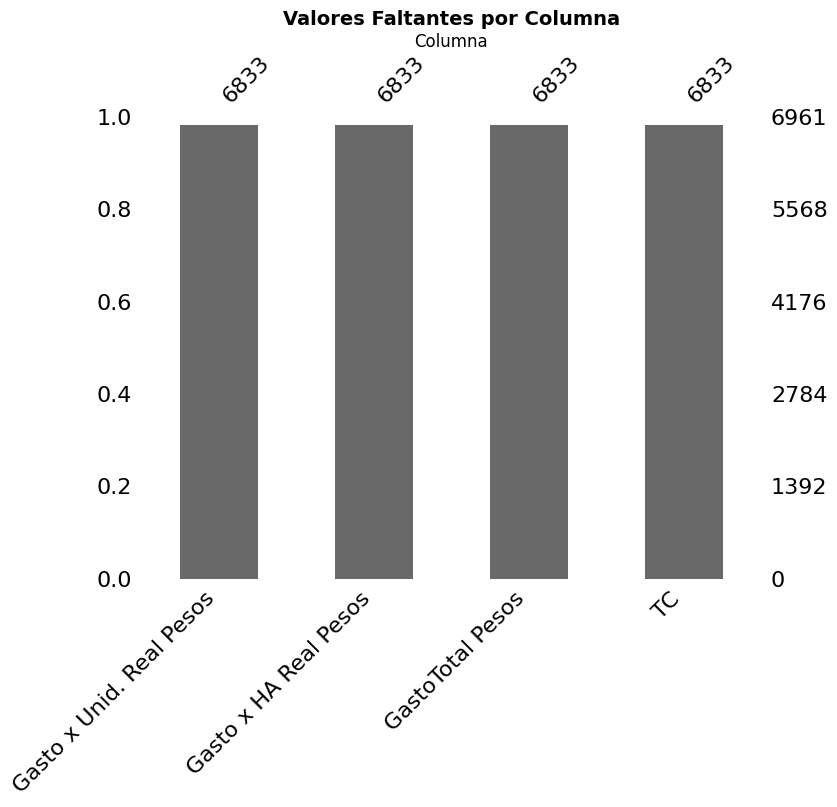

Gráfico de barras de valores faltantes generado con tamaño ajustado y números en negrita.


In [ ]:

print("\n--- Generando gráfico de barras de valores faltantes (tamaño más pequeño, números en negrita) ---")

# 1. Controlar el tamaño de la imagen con 'figsize'
# El primer valor es el ancho, el segundo es el alto.
# Prueba diferentes valores para encontrar el tamaño que prefieras (ej. (8, 6) o (6, 4))
ax = msno.bar(df_new, figsize=(8, 6)) # figsize para controlar el tamaño de la figura

# 2. Hacer los números (etiquetas de texto) en negrita
# Después de que el gráfico se dibuja, podemos acceder a los objetos de texto del eje.
for text in ax.texts: # Itera sobre todos los objetos de texto en el gráfico
    text.set_fontweight('bold') # Establece el peso de la fuente a negrita
    text.set_fontsize(10)      # Opcional: ajustar tamaño de la fuente si es necesario

plt.title('Valores Faltantes por Columna', fontsize=14, fontweight='bold') # Opcional: título más pequeño/negrita
plt.xlabel('Columna', fontsize=12) # Opcional: ajustar etiquetas
plt.ylabel('Proporción no nula', fontsize=12) # Opcional: ajustar etiquetas

plt.show() # Muestra el gráfico
print("Gráfico de barras de valores faltantes generado con tamaño ajustado y números en negrita.")

In [ ]:
# Lista de las columnas que quieres inspeccionar, tal como las marcaste en la imagen
columns_to_check = [
    'Gasto x Unid. Real Pesos',
    'Gasto x HA Real Pesos',
    'GastoTotal Pesos',
    'TC',]

# Inicializa un diccionario para guardar los conteos de nulos
missing_counts = {}

# Itera sobre las columnas y cuenta los nulos
for col in columns_to_check:
    if col in df.columns:
        missing_counts[col] = df[col].isnull().sum()
    else:
        missing_counts[col] = "Columna NO encontrada" # En caso de que alguna columna no exista

# Crea el mini DataFrame con los resultados
df_missing_summary = pd.DataFrame(
    list(missing_counts.items()),
    columns=['Columna', 'Valores Faltantes']
)

# Ordena por la cantidad de valores faltantes de mayor a menor (opcional, pero útil)
df_missing_summary['Valores Faltantes'] = pd.to_numeric(df_missing_summary['Valores Faltantes'], errors='coerce').fillna(-1) # Para poder ordenar si hay "Columna NO encontrada"
df_missing_summary = df_missing_summary.sort_values(by='Valores Faltantes', ascending=False)
df_missing_summary['Valores Faltantes'] = df_missing_summary['Valores Faltantes'].replace({-1: "Columna NO encontrada"}) # Revertir el valor de la columna no encontrada

df_missing_summary

print("\n--- Mini DataFrame de Faltantes Creado ---")


--- Mini DataFrame de Faltantes Creado ---


In [ ]:
df_missing_summary

,Columna,Valores Faltantes
0,Gasto x Unid. Real Pesos,128
1,Gasto x HA Real Pesos,128
2,GastoTotal Pesos,128
3,TC,128


In [ ]:
# Guarda el número de filas original para verificar al final que no se eliminó nada
filas_originales = len(df)

# --- 2. Preparar las columnas 'Nro° OT' y 'TC' ---
# Asegúrate de que 'Nro° OT' sea el nombre EXACTO de tu columna
nombre_columna_ot = 'Nro° OT' # <--- ¡CONFIRMA QUE ESTE ES EL NOMBRE CORRECTO!

# Convertir 'TC' a número (float)
# 'errors='coerce'' convierte los valores que no son numéricos a NaN (Not a Number), sin eliminar la fila
df['TC'] = pd.to_numeric(df['TC'], errors='coerce')
print(f"Filas después de convertir 'TC' a numérico: {len(df)}")

print("\n--- Preparación de columnas 'Nro° OT' y 'TC' terminada ---")
print(f"Valores nulos en 'TC' antes de imputar: {df['TC'].isnull().sum()}")
print(f"Valores únicos en '{nombre_columna_ot}': {df[nombre_columna_ot].nunique()}")


# --- 3. Imputar 'TC' por grupo de 'Nro° OT' ---

# Creamos una copia de la columna 'TC' para no modificar la original directamente
df['TC_imputado_por_ot'] = df['TC'].copy()

# Rellenamos los valores nulos en 'TC_imputado_por_ot' con la media de 'TC'
# dentro de cada grupo de 'Nro° OT'.
# Esto es una imputación 'group-wise' o 'por grupo'.
# Si un 'Nro° OT' no tiene ningún TC válido, su media será NaN, y luego lo manejaremos.
df['TC_imputado_por_ot'] = df.groupby(nombre_columna_ot)['TC_imputado_por_ot'].transform(lambda x: x.fillna(x.mean()))
print(f"Filas después de imputar TC por 'Nro° OT' (primera pasada): {len(df)}")

# Si después de la imputación por grupo, todavía quedan NaNs en 'TC_imputado_por_ot'
# (esto pasaría si un 'Nro° OT' específico NO tenía NINGÚN valor de TC no nulo),
# rellenamos esos NaNs restantes con la media global de 'TC' imputado.
if df['TC_imputado_por_ot'].isnull().any():
    media_global_tc_imputado = df['TC_imputado_por_ot'].mean()
    df['TC_imputado_por_ot'] = df['TC_imputado_por_ot'].fillna(media_global_tc_imputado)
    print(f"ATENCIÓN: Algunos NaNs restantes en TC_imputado_por_ot se rellenaron con la media global ({media_global_tc_imputado:.2f}).")
print(f"Filas después de imputar TC globalmente (si necesario): {len(df)}")

print("\n--- Imputación de TC por 'Nro° OT' completada ---")
print(f"Valores nulos en 'TC_imputado_por_ot' después de la imputación: {df['TC_imputado_por_ot'].isnull().sum()}")


Filas después de convertir 'TC' a numérico: 6961

--- Preparación de columnas 'Nro° OT' y 'TC' terminada ---
Valores nulos en 'TC' antes de imputar: 128
Valores únicos en 'Nro° OT': 862
Filas después de imputar TC por 'Nro° OT' (primera pasada): 6961
ATENCIÓN: Algunos NaNs restantes en TC_imputado_por_ot se rellenaron con la media global (1036.17).
Filas después de imputar TC globalmente (si necesario): 6961

--- Imputación de TC por 'Nro° OT' completada ---
Valores nulos en 'TC_imputado_por_ot' después de la imputación: 0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6961 entries, 0 to 6960
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Campaña                         6961 non-null   object 
 1   Cultivo                         6961 non-null   object 
 2   Actividad                       6961 non-null   object 
 3   Cambio
Actividad                6961 non-null   object 
 4   Centro                          6961 non-null   int64  
 5   Administracion                  6961 non-null   object 
 6   Zona                            6961 non-null   object 
 7   Establecimiento                 6961 non-null   object 
 8   Lote                            6961 non-null   object 
 9   CECO                            6961 non-null   int64  
 10  Ha Totales                      6961 non-null   float64
 11  Ha Asignadas                    6961 non-null   float64
 12  Código                          69

In [ ]:
# Columnas en Dólares que quieres convertir a Pesos
columnas_usd_a_convertir = [
    'Costo x Unid. Real usd',
    'Costo x HA Real usd',
    'Costo Total usd'
]

# Proceso para cada columna USD: Limpiar, convertir a numérico y multiplicar por TC_imputado_por_ot
for col_usd in columnas_usd_a_convertir:
    # Nombre de la nueva columna en Pesos (ej. 'Costo x Unid. Real Pesos')
    col_pesos = col_usd.replace(' usd', ' Pesos') # Reemplaza ' usd' por ' Pesos'

    # Verifica si la columna USD original existe antes de intentar usarla
    if col_usd in df.columns:
        # **ESTA ES LA CORRECCIÓN CLAVE:**
        # Convertir a string (por si hay mezcla de tipos), luego a numérico,
        # manejando errores y rellenando NaNs.
        df[col_usd] = pd.to_numeric(
            df[col_usd].astype(str) # Asegura que es string para .str.replace
                       .str.replace('$', '', regex=False) # Quita el signo $
                       .str.replace(',', '', regex=False) # Quita las comas
                       .str.strip(), # Elimina espacios en blanco
            errors='coerce' # Convierte valores no numéricos a NaN
        ).fillna(0) # Reemplaza cualquier NaN (incluidos los generados por coerce) con 0

        # Ahora que la columna USD está limpia y es numérica, podemos multiplicarla
        df[col_pesos] = df[col_usd] * df['TC_imputado_por_ot']
        print(f"Columna '{col_pesos}' creada.")
    else:
        print(f"ADVERTENCIA: La columna '{col_usd}' no fue encontrada en el DataFrame. No se pudo crear '{col_pesos}'.")
        df[col_pesos] = np.nan # Crea la columna con NaNs si la original no existe


# --- Opcional: Verificación de las nuevas columnas ---
print("\n--- Primeras 5 filas con las nuevas columnas en Pesos ---")
columnas_para_mostrar = [
    'Costo x Unid. Real usd', 'Costo x Unid. Real Pesos',
    'Costo x HA Real usd', 'Costo x HA Real Pesos',
    'Costo Total usd', 'Costo Total Pesos',
    'TC_imputado_por_ot'
]
# Filtramos para mostrar solo las columnas que realmente se crearon
columnas_existentes = [col for col in columnas_para_mostrar if col in df.columns]
print(df[columnas_existentes].head())

print("\n--- Conteo de valores nulos en las nuevas columnas en Pesos ---")
for col_usd in columnas_usd_a_convertir:
    col_pesos = col_usd.replace(' usd', ' Pesos')
    if col_pesos in df.columns:
        print(f"Nulos en '{col_pesos}': {df[col_pesos].isnull().sum()}")

Columna 'Costo x Unid. Real Pesos' creada.
Columna 'Costo x HA Real Pesos' creada.
Columna 'Costo Total Pesos' creada.

--- Primeras 5 filas con las nuevas columnas en Pesos ---
   Costo x Unid. Real usd  Costo x Unid. Real Pesos  Costo x HA Real usd  \
0                    0.40                    408.00                26.99   
1                   23.95                 24,237.40                 1.18   
2                    6.24                  6,314.88                 6.15   
3                    0.83                    839.96                 0.42   
4                    7.19                  7,276.28                 7.09   

   Costo x HA Real Pesos  Costo Total usd  Costo Total Pesos  \
0              27,529.80         5,938.52       6,057,290.40   
1               1,194.16           259.61         262,725.32   
2               6,223.80         1,353.04       1,369,276.48   
3                 425.04            93.31          94,429.72   
4               7,175.08         1,558.71    

In [ ]:
df_filtrao1=df[df['Marca_Gasto x Unid. Real Pesos'] == 1]
df_filtrao1.head(3)

,Campaña,Cultivo,Actividad,Cambio\nActividad,Centro,Administracion,Zona,Establecimiento,Lote,CECO,Ha Totales,Ha Asignadas,Código,Nombre,Fecha Inicio,Fecha Fin,Fecha Contable,Fecha Creacion,Fecha Actualiz.,Estado,Categoria,Cod. SAP,Insumo,Almacen SAP,U. Medida,Cantidad Real,Dosis Real,Porc. utiliza Real,Costo x Unid. Real usd,Costo x HA Real usd,Costo Total usd,Gasto x Unid. Real Pesos,Gasto x HA Real Pesos,GastoTotal Pesos,Nro° OT,Contratista/Operario,Maquinaria,TC,Socio,Nro° OT Anulación,Observaciones,Marca_Gasto x Unid. Real Pesos,Marca_Gasto x HA Real Pesos,Marca_GastoTotal Pesos,TC_imputado_por_ot,Costo x Unid. Real Pesos,Costo x HA Real Pesos,Costo Total Pesos
375,2024-2025,Algodón,Algodón,NO,2100,2100 - Campos,Zona Sudeste,La Porteña,Lote 02,1124204,110.00,50.00,30002447,30002447 - PULVERIZACIÓN TERRESTRE -LA,04/02/2025,04/02/2025,04/02/2025,04/02/2025,10/02/2025,Terminada,AGROQFERTILLIQUIDOS,700711,SULFATO DE AMONIO LIQUIDO,2100-2192 - Anonima SA - La,L,20.00,0.40,100.00,0.83,0.33,16.61,NaN,NaN,NaN,300000175,NaN,NaN,NaN,NaN,NaN,Maquinista: Elio Espindola - Formulador: Elian...,1,1,1,"1,036.17",860.02,341.94,"17,210.78"
376,2024-2025,Algodón,Algodón,NO,2100,2100 - Campos,Zona Sudeste,La Porteña,Lote 02,1124204,110.00,50.00,30002447,30002447 - PULVERIZACIÓN TERRESTRE -LA,04/02/2025,04/02/2025,04/02/2025,04/02/2025,10/02/2025,Terminada,AGROQPQINSECTICIDA,719250,ESFENVALERATO 10% ACETAMIPRID 10% EC,2100-2192 - Anonima SA - La,L,13.00,0.26,100.00,30.24,7.86,393.12,NaN,NaN,NaN,300000175,NaN,NaN,NaN,NaN,NaN,Maquinista: Elio Espindola - Formulador: Elian...,1,1,1,"1,036.17","31,333.78","8,144.30","407,339.12"
377,2024-2025,Algodón,Algodón,NO,2100,2100 - Campos,Zona Sudeste,La Porteña,Lote 02,1124204,110.00,50.00,30002447,30002447 - PULVERIZACIÓN TERRESTRE -LA,04/02/2025,04/02/2025,04/02/2025,04/02/2025,10/02/2025,Terminada,AGROQPQOTROS,719499,LIMPIADOR DESGASIFICADOR DE TANQUES,2100-2192 - Anonima SA - La,L,3.00,0.06,100.00,27.45,1.65,82.35,NaN,NaN,NaN,300000175,NaN,NaN,NaN,NaN,NaN,Maquinista: Elio Espindola - Formulador: Elian...,1,1,1,"1,036.17","28,442.86","1,709.68","85,328.59"



# Seleccion de variables

In [ ]:
print(df.columns.tolist())


['Campaña', 'Cultivo', 'Actividad', 'Cambio\nActividad', 'Centro', 'Administracion', 'Zona', 'Establecimiento', 'Lote', 'CECO', 'Ha Totales', 'Ha Asignadas', 'Código', 'Nombre', 'Fecha Inicio', 'Fecha Fin', 'Fecha Contable', 'Fecha Creacion', 'Fecha Actualiz.', 'Estado', 'Categoria', 'Cod. SAP', 'Insumo', 'Almacen SAP', 'U. Medida', 'Cantidad Real', 'Dosis Real', 'Porc. utiliza Real', 'Costo x Unid. Real usd', 'Costo x HA Real usd', 'Costo Total usd', 'Gasto x Unid. Real Pesos', 'Gasto x HA Real Pesos', 'GastoTotal Pesos', 'Nro° OT', 'Contratista/Operario', 'Maquinaria', 'TC', 'Socio', 'Nro° OT Anulación', 'Observaciones', 'Marca_Gasto x Unid. Real Pesos', 'Marca_Gasto x HA Real Pesos', 'Marca_GastoTotal Pesos', 'TC_imputado_por_ot', 'Costo x Unid. Real Pesos', 'Costo x HA Real Pesos', 'Costo Total Pesos']


In [ ]:
df_2=df[['Cultivo','Zona','Establecimiento','Ha Totales','Ha Asignadas','Fecha Inicio', 'Fecha Fin','Cod. SAP', 'Insumo','Categoria','Lote', 'U. Medida', 'Cantidad Real', 'Dosis Real', 'Porc. utiliza Real', 'Costo x Unid. Real usd', 'Costo x HA Real usd', 'Costo Total usd','Marca_Gasto x Unid. Real Pesos', 'Marca_Gasto x HA Real Pesos', 'Marca_GastoTotal Pesos', 'TC_imputado_por_ot', 'Costo x Unid. Real Pesos', 'Costo x HA Real Pesos', 'Costo Total Pesos','Nro° OT']]

In [ ]:
df_2.head()

,Cultivo,Zona,Establecimiento,Ha Totales,Ha Asignadas,Fecha Inicio,Fecha Fin,Cod. SAP,Insumo,Categoria,Lote,U. Medida,Cantidad Real,Dosis Real,Porc. utiliza Real,Costo x Unid. Real usd,Costo x HA Real usd,Costo Total usd,Marca_Gasto x Unid. Real Pesos,Marca_Gasto x HA Real Pesos,Marca_GastoTotal Pesos,TC_imputado_por_ot,Costo x Unid. Real Pesos,Costo x HA Real Pesos,Costo Total Pesos,Nro° OT
0,Algodón,Zona Centro,Tenené,221.15,548.00,04/12/2024,17/12/2024,723125,SUPER FOSFATO SIMPLE,FERTILIZANTES,Lote 06,KG,"14,902.19",67.74,100.00,0.40,26.99,"5,938.52",0,0,0,"1,020.00",408.00,"27,529.80","6,057,290.40",400000128
1,Algodón,Zona Centro,Tenené,221.15,548.00,06/12/2024,07/12/2024,722543,COADYUVANTE HUMECTANTE VERDE BIO,AGROQPQCOADYUVANTE,Lote 06,L,10.84,0.05,100.00,23.95,1.18,259.61,0,0,0,"1,012.00","24,237.40","1,194.16","262,725.32",400000138
2,Algodón,Zona Centro,Tenené,221.15,548.00,06/12/2024,07/12/2024,610223,GLIFOSATO 79.2% SG,AGROQPQHERBICIDA,Lote 06,KG,216.79,0.99,100.00,6.24,6.15,"1,353.04",0,0,0,"1,012.00","6,314.88","6,223.80","1,369,276.48",400000138
3,Algodón,Zona Centro,Tenené,221.15,548.00,06/12/2024,07/12/2024,700711,SULFATO DE AMONIO LIQUIDO,AGROQFERTILLIQUIDOS,Lote 06,L,112.41,0.51,100.00,0.83,0.42,93.31,0,0,0,"1,012.00",839.96,425.04,"94,429.72",400000138
4,Algodón,Zona Centro,Tenené,221.15,548.00,06/12/2024,07/12/2024,716992,S-METOLACLORO 96% EC,AGROQUIMICOS,Lote 06,L,216.79,0.99,100.00,7.19,7.09,"1,558.71",0,0,0,"1,012.00","7,276.28","7,175.08","1,577,414.52",400000138


# Analisis exploratorio

In [ ]:
# --- 1. Visión General del DataFrame df_2 ---
print("--- 1. Visión General del DataFrame df_2 ---")
print("\nInformación general (tipos de datos, no-nulos):")
df_2.info() # Ya lo has usado, pero es fundamental para empezar.

print(f"\nDimensiones del DataFrame: {df_2.shape} (Filas, Columnas)")
print(f"Total de registros: {len(df_2)} filas")

--- 1. Visión General del DataFrame df_2 ---

Información general (tipos de datos, no-nulos):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6961 entries, 0 to 6960
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Cultivo                         6961 non-null   object 
 1   Zona                            6961 non-null   object 
 2   Establecimiento                 6961 non-null   object 
 3   Ha Totales                      6961 non-null   float64
 4   Ha Asignadas                    6961 non-null   float64
 5   Fecha Inicio                    6961 non-null   object 
 6   Fecha Fin                       6961 non-null   object 
 7   Cod. SAP                        6961 non-null   int64  
 8   Insumo                          6961 non-null   object 
 9   Categoria                       6961 non-null   object 
 10  Lote                            6961 non-null   object 
 11  U

In [ ]:
# --- 2. Estadísticas Descriptivas para Columnas Numéricas ---
print("\n--- 2. Estadísticas Descriptivas (Columnas Numéricas) ---")
# Seleccionamos solo las columnas numéricas relevantes para este análisis
columnas_numericas_eda = [
    'Ha Totales', 'Ha Asignadas', 'Cantidad Real', 'Dosis Real', 'Porc. utiliza Real',
    'Costo x Unid. Real usd', 'Costo x HA Real usd', 'Costo Total usd',
    'TC_imputado_por_ot', 'Costo x Unid. Real Pesos', 'Costo x HA Real Pesos', 'Costo Total Pesos'
]
print(df_2[columnas_numericas_eda].describe().T) # .T para transponer y leer mejor


--- 2. Estadísticas Descriptivas (Columnas Numéricas) ---
                            count         mean          std  min       25%  \
Ha Totales               6,961.00       145.45       188.76 9.04     64.07   
Ha Asignadas             6,961.00       497.36       521.10 5.00    157.00   
Dosis Real               6,961.00         4.51        18.02 0.00      0.10   
Porc. utiliza Real       6,961.00        99.85         3.27 1.97    100.00   
Costo x Unid. Real usd   6,961.00        41.31        99.28 0.37      1.78   
Costo x HA Real usd      6,961.00         9.42        20.06 0.00      0.69   
Costo Total usd          6,961.00     1,076.30     2,843.88 0.01     53.90   
TC_imputado_por_ot       6,961.00     1,036.17        64.26 0.00  1,028.00   
Costo x Unid. Real Pesos 6,961.00    42,786.47   103,090.56 0.00  1,818.27   
Costo x HA Real Pesos    6,961.00     9,719.21    20,812.07 0.00    689.49   
Costo Total Pesos        6,961.00 1,103,976.62 2,924,741.77 0.00 55,290.94   

    


Visualización de Distribuciones (Histogramas):


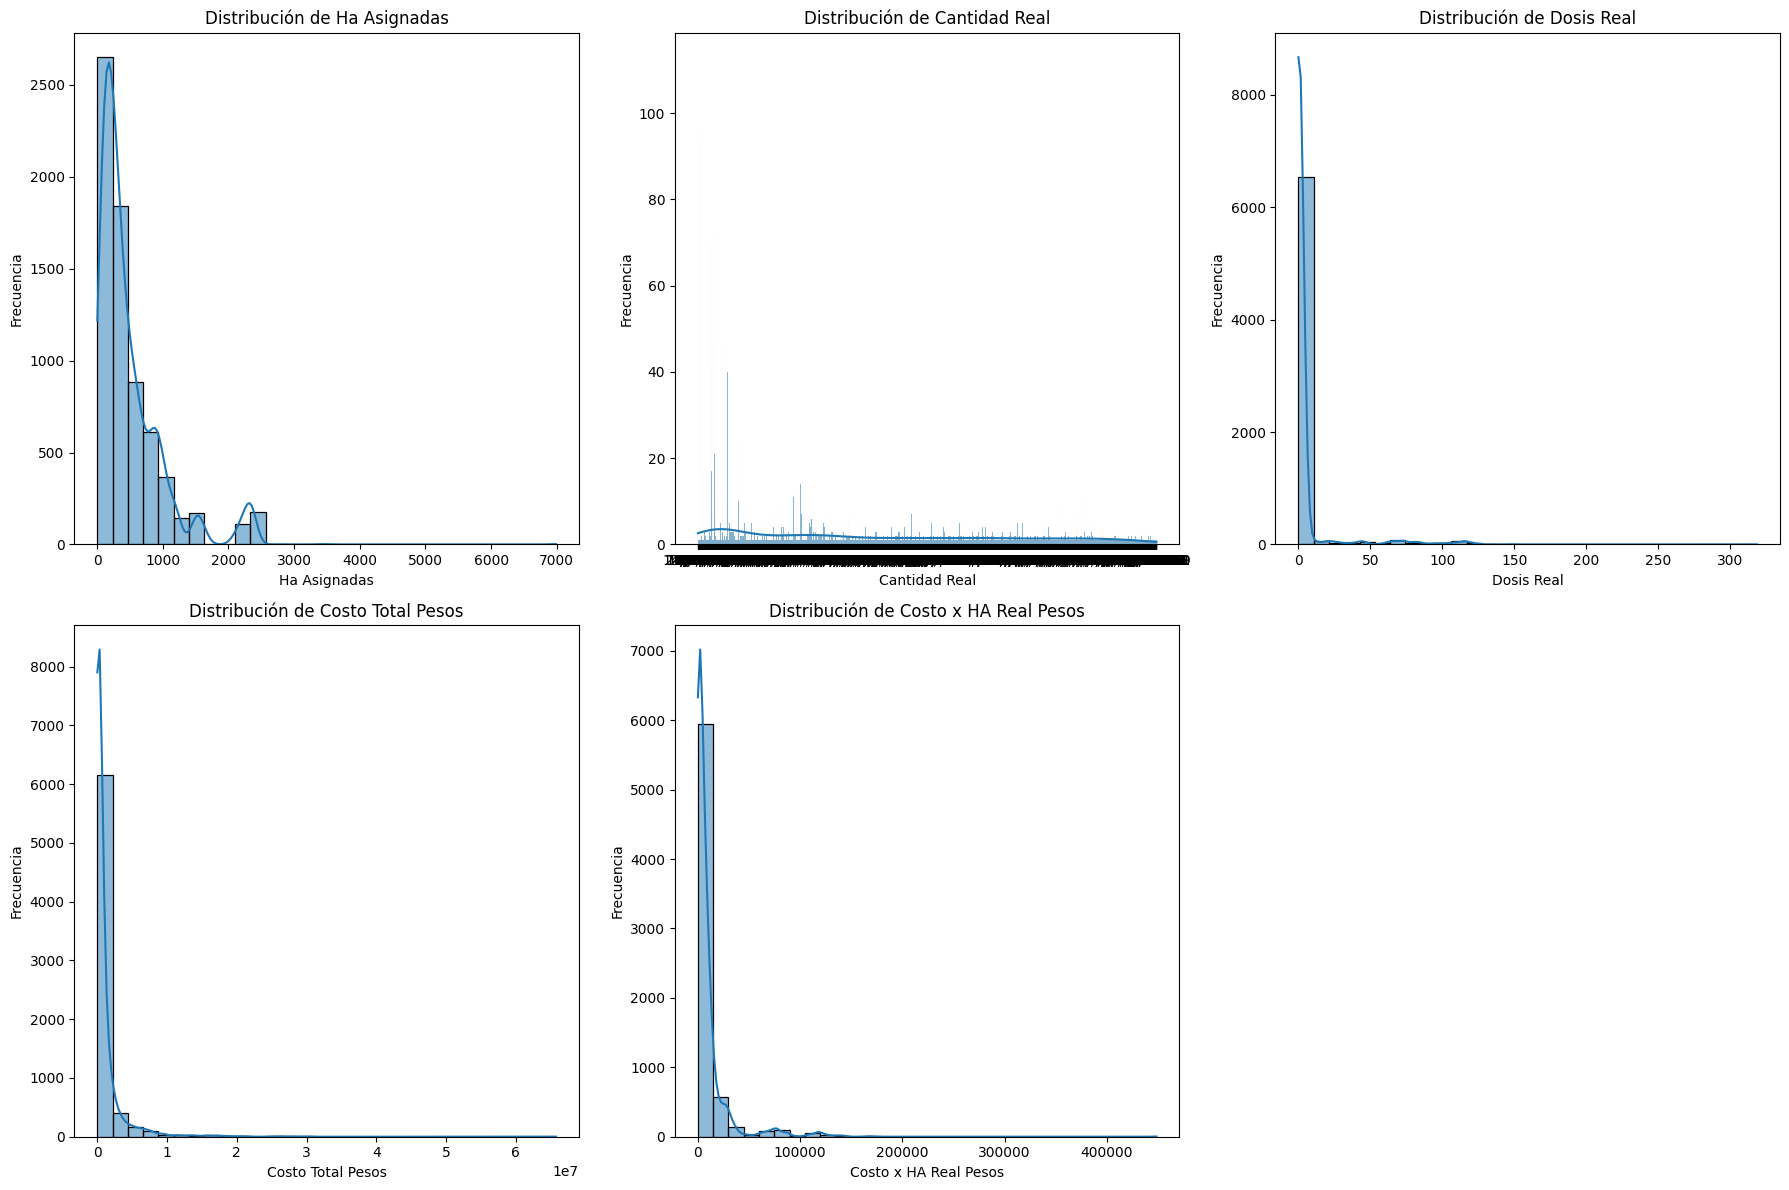

In [ ]:
print("\nVisualización de Distribuciones (Histogramas):")
plt.figure(figsize=(18, 12)) # Ajusta el tamaño de la figura
# Ajusta las columnas a visualizar si algunas tienen un rango muy grande o son menos relevantes
cols_for_hist = ['Ha Asignadas', 'Cantidad Real', 'Dosis Real', 'Costo Total Pesos', 'Costo x HA Real Pesos']
for i, col in enumerate(cols_for_hist):
    plt.subplot(2, 3, i + 1) # 2 filas, 3 columnas para los subplots
    sns.histplot(df_2[col], kde=True, bins=30)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
plt.tight_layout() # Ajusta el layout para que no se superpongan los títulos
plt.show()


--- 4. Análisis de Columnas Categóricas ---

--- Columna: Cultivo ---
Número de valores únicos: 9
Valores más frecuentes:
Cultivo
Maiz                2916
Soja                2135
Poroto Negro         691
Algodón              419
Poroto Cranberry     355
Sorgo                261
Poroto Dark          106
Poroto Alubia         52
Mani                  26
Name: count, dtype: int64


<ipython-input-117-5a343978d5ca>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_2[col], order=df_2[col].value_counts().index[:10], palette='viridis')


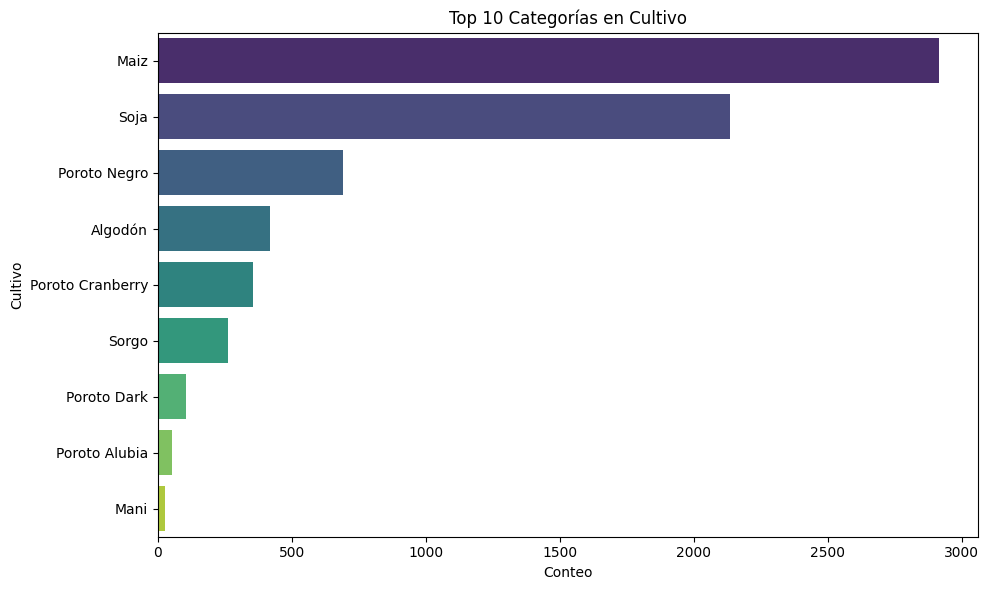


--- Columna: Zona ---
Número de valores únicos: 6
Valores más frecuentes:
Zona
Zona Lajitas    2276
Zona Metan      1740
Zona Este        849
Zona Centro      777
Zona Sur         714
Zona Sudeste     605
Name: count, dtype: int64


<ipython-input-117-5a343978d5ca>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_2[col], order=df_2[col].value_counts().index[:10], palette='viridis')


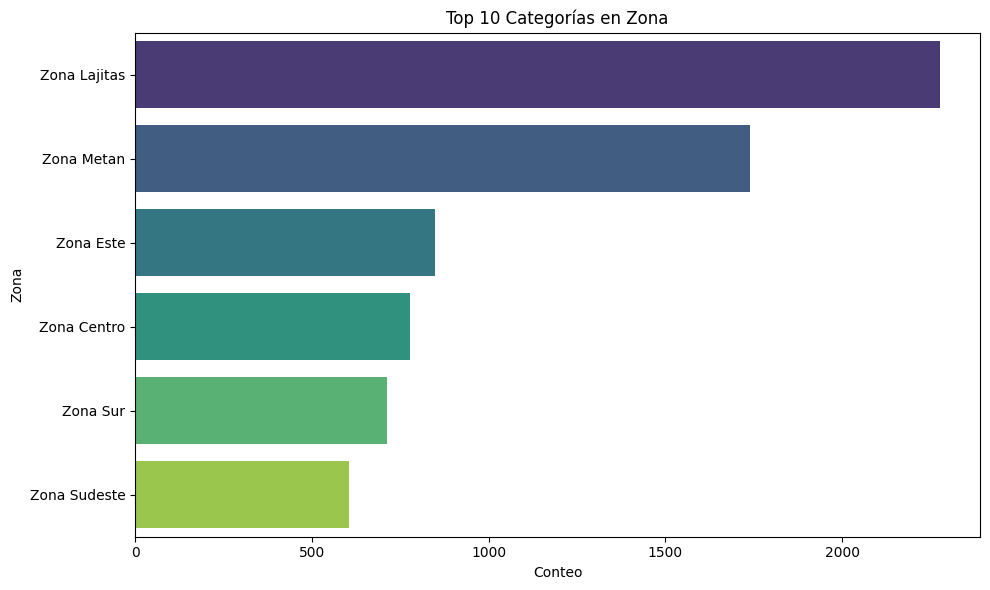


--- Columna: Establecimiento ---
Número de valores únicos: 16
Valores más frecuentes:
Establecimiento
Pozo Espuela     1837
Buenaventura      778
La Porteña        605
Campo Azul        587
Rancho Grande     582
Las Marías        516
El Trebol         439
Anta              375
Tenené            340
Coromama          237
Name: count, dtype: int64


<ipython-input-117-5a343978d5ca>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_2[col], order=df_2[col].value_counts().index[:10], palette='viridis')


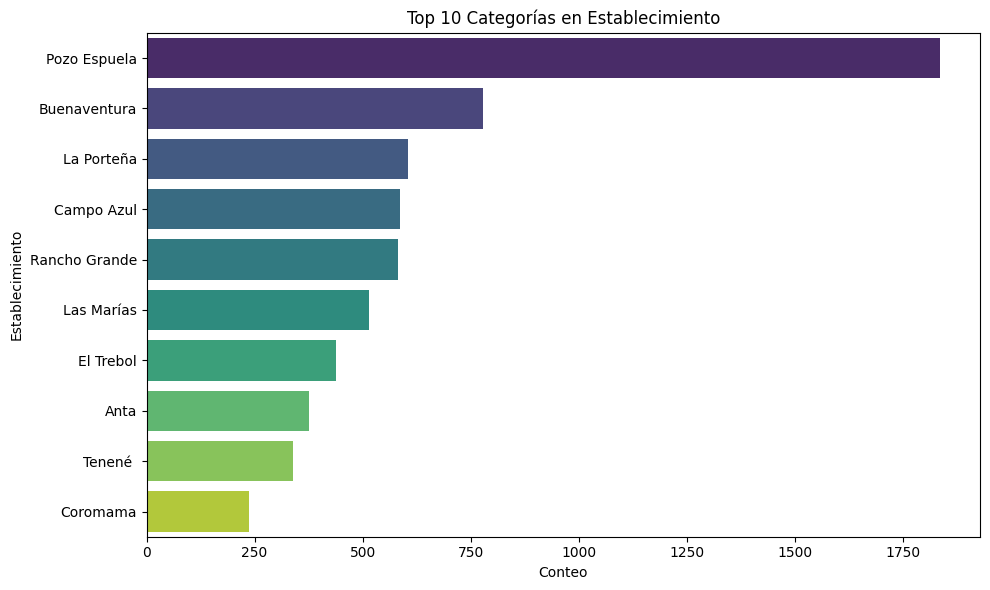


--- Columna: Cod. SAP ---
Número de valores únicos: 135
Valores más frecuentes:
Cod. SAP
700711    627
610223    488
723104    419
707688    410
719953    315
721441    285
723125    269
722543    245
714586    243
714297    199
Name: count, dtype: int64

--- Columna: Insumo ---
Número de valores únicos: 135
Valores más frecuentes:
Insumo
SULFATO DE AMONIO LIQUIDO                   627
GLIFOSATO 79.2% SG                          488
COADYUVANTE BIOMAX                          419
COADYUVANTE VEGETAL OIL                     410
BIFENTRIN 25% EC                            315
FERTILIZANTE LÍQUI N-P-K-Mg-Zn-S-B-MN-CA    285
SUPER FOSFATO SIMPLE                        269
COADYUVANTE HUMECTANTE VERDE BIO            245
GLUFOSINATO DE AMONIO 28% SL                243
ACEITE EMULSIVO MINERAL-NO GRADO ALIM.RV    199
Name: count, dtype: int64

--- Columna: Categoria ---
Número de valores únicos: 13
Valores más frecuentes:
Categoria
AGROQUIMICOS           1486
AGROQPQHERBICIDA       1226
AGROQ

<ipython-input-117-5a343978d5ca>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_2[col], order=df_2[col].value_counts().index[:10], palette='viridis')


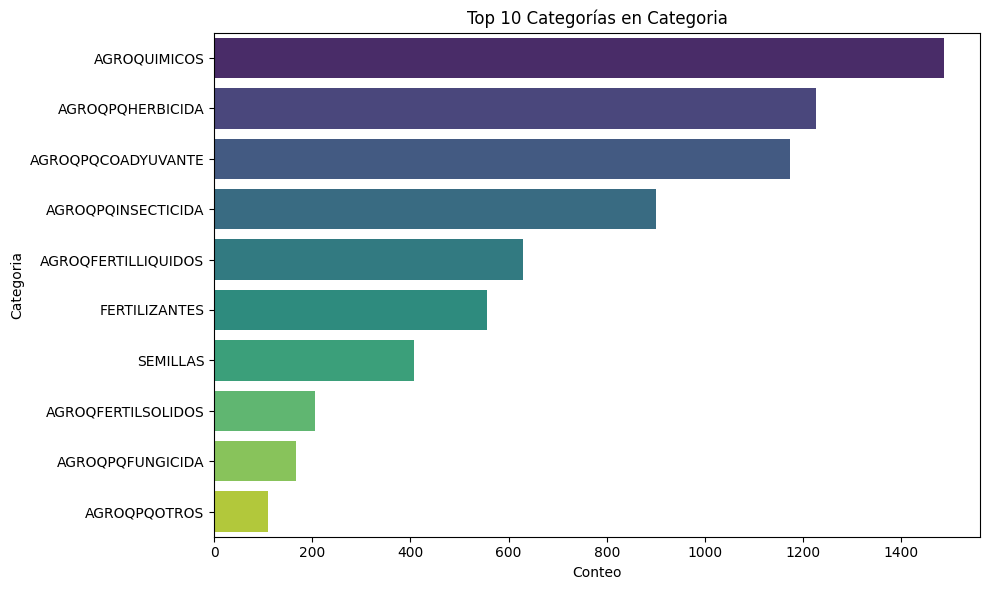


--- Columna: Lote ---
Número de valores únicos: 136
Valores más frecuentes:
Lote
Lote 14    180
Lote 06    164
Lote 08    162
Lote 17    161
Lote 07    156
Lote 09    152
Lote 19    150
Lote 11    145
Lote 16    139
Lote 12    138
Name: count, dtype: int64

--- Columna: U. Medida ---
Número de valores únicos: 5
Valores más frecuentes:
U. Medida
L           5096
KG          1289
BAG          216
PCK          185
Tonelada     175
Name: count, dtype: int64


<ipython-input-117-5a343978d5ca>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_2[col], order=df_2[col].value_counts().index[:10], palette='viridis')


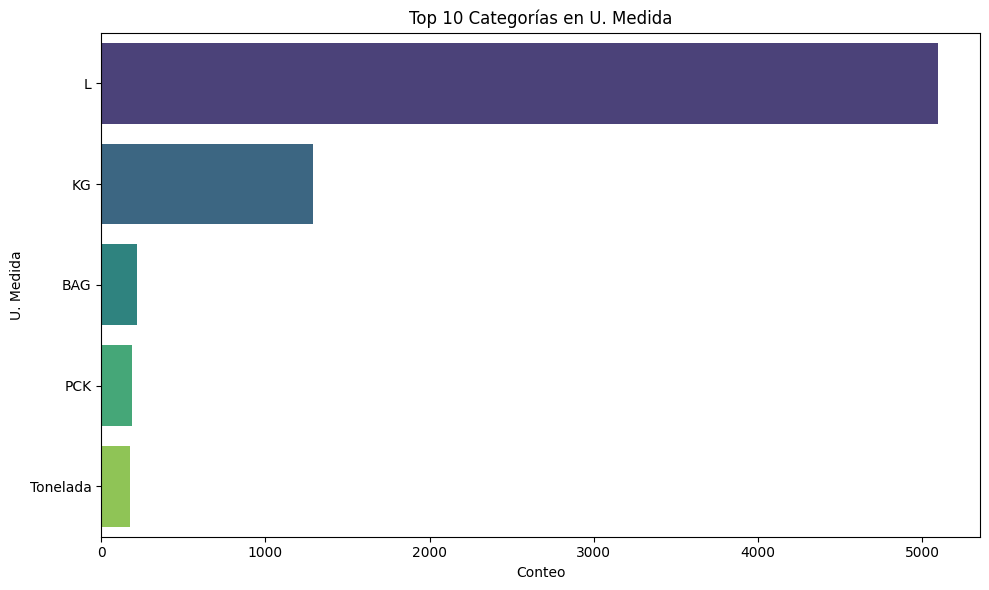

In [ ]:
# --- 4. Análisis de Columnas Categóricas ---
print("\n--- 4. Análisis de Columnas Categóricas ---")
columnas_categoricas = ['Cultivo', 'Zona', 'Establecimiento', 'Cod. SAP', 'Insumo', 'Categoria', 'Lote', 'U. Medida']

for col in columnas_categoricas:
    if col in df_2.columns:
        print(f"\n--- Columna: {col} ---")
        print(f"Número de valores únicos: {df_2[col].nunique()}")
        # Muestra los valores más frecuentes (top 10)
        print("Valores más frecuentes:")
        print(df_2[col].value_counts(dropna=False).head(10)) # dropna=False para incluir NaNs si los hubiera

        # Visualización de las 10 categorías más frecuentes (para columnas con muchos únicos)
        if df_2[col].nunique() > 1 and df_2[col].nunique() < 50: # Evitar gráficos con demasiadas barras
            plt.figure(figsize=(10, 6))
            sns.countplot(y=df_2[col], order=df_2[col].value_counts().index[:10], palette='viridis')
            plt.title(f'Top 10 Categorías en {col}')
            plt.xlabel('Conteo')
            plt.ylabel(col)
            plt.tight_layout()
            plt.show()


--- 5. Análisis de Costos y Gastos por Categoría Clave (MEJORADO) ---

<ipython-input-118-b5ba92cd88b1>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=costo_por_cultivo.head(10).values,




Costo Total Pesos por Cultivo:
Cultivo
Maiz               3,982,454,113.76
Soja               1,864,234,845.62
Poroto Negro         572,555,799.80
Algodón              461,566,831.60
Sorgo                424,058,951.29
Poroto Cranberry     284,128,283.69
Poroto Alubia         36,187,551.09
Mani                  30,700,848.76
Poroto Dark           28,893,997.70
Name: Costo Total Pesos, dtype: float64


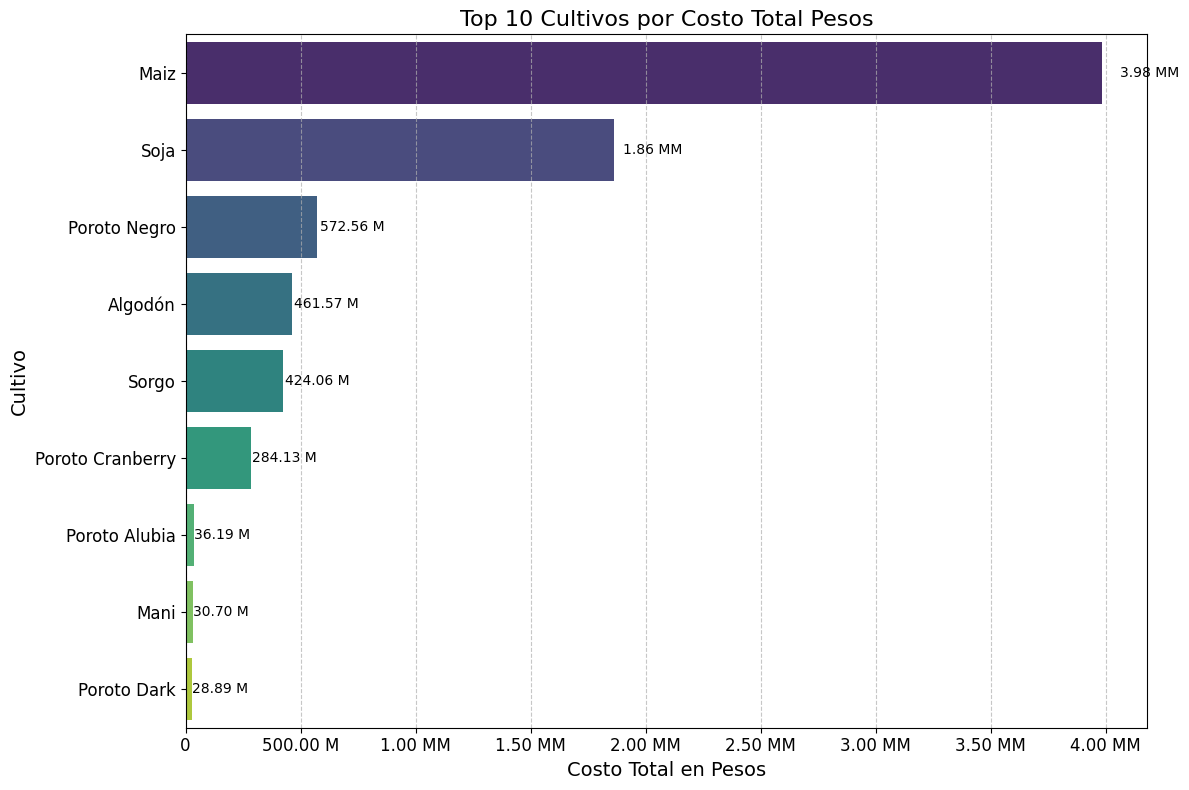


--- Análisis de Costos por Cultivo MEJORADO Completado ---


In [ ]:
from matplotlib.ticker import FuncFormatter # ¡Esta es la importación que faltaba!

print("\n--- 5. Análisis de Costos y Gastos por Categoría Clave (MEJORADO) ---")

# Agrupar por Cultivo y sumar Costo Total Pesos
print("\nCosto Total Pesos por Cultivo:")
if 'Costo Total Pesos' in df_2.columns and 'Cultivo' in df_2.columns:
    costo_por_cultivo = df_2.groupby('Cultivo')['Costo Total Pesos'].sum().sort_values(ascending=False)
    print(costo_por_cultivo.head(10))

    plt.figure(figsize=(12, 8)) # Aumentar el tamaño para mejor visibilidad

    # Usar seaborn.barplot directamente con la serie agrupada
    # Es importante que el `x` y el `y` estén alineados.
    # Si `costo_por_cultivo` es una Serie, `costo_por_cultivo.index` son los cultivos (y)
    # y `costo_por_cultivo.values` son los costos (x).
    sns.barplot(x=costo_por_cultivo.head(10).values,
                y=costo_por_cultivo.head(10).index,
                palette='viridis') # Cambiado a 'viridis' para un aspecto moderno

    plt.title('Top 10 Cultivos por Costo Total Pesos', fontsize=16)
    plt.xlabel('Costo Total en Pesos', fontsize=14) # Etiqueta del eje X
    plt.ylabel('Cultivo', fontsize=14)

    # --- Mejora del Eje X: Formato de los números grandes ---
    # Define una función para formatear los números a miles de millones (MM)
    def format_billions(x, pos):
        if x >= 1e9: # Si es mayor o igual a mil millones
            return f'{x * 1e-9:.2f} MM' # Formatea como "X.YY MM" (miles de millones)
        elif x >= 1e6: # Si es mayor o igual a un millón
            return f'{x * 1e-6:.2f} M' # Formatea como "X.YY M" (millones)
        else:
            return f'{x:.0f}' # Para números más pequeños, sin decimales o en su escala original

    formatter = FuncFormatter(format_billions)
    plt.gca().xaxis.set_major_formatter(formatter)

    # --- Añadir valores numéricos en las barras ---
    for i, (costo, cultivo) in enumerate(zip(costo_por_cultivo.head(10).values, costo_por_cultivo.head(10).index)):
        # Ajusta la posición del texto para que no se superponga
        plt.text(costo * 1.02, # Un 2% más allá de la barra
                 i, # El índice 'i' corresponde a la posición de la barra en el eje Y
                 format_billions(costo, None), # Usa la misma función de formateo para el texto
                 color='black', ha="left", va='center', fontsize=10)


    plt.xticks(fontsize=12) # Aumentar el tamaño de los ticks del eje X
    plt.yticks(fontsize=12) # Aumentar el tamaño de los ticks del eje Y

    plt.grid(axis='x', linestyle='--', alpha=0.7) # Mantiene la cuadrícula
    plt.tight_layout() # Ajusta el diseño
    plt.show()

else:
    print("Columnas 'Costo Total Pesos' o 'Cultivo' no encontradas para este análisis.")

print("\n--- Análisis de Costos por Cultivo MEJORADO Completado ---")


--- 5. Análisis de Costos y Gastos por Categoría Clave (MEJORADO) ---

Costo Total Pesos por Categoría de Insumo:
Categoria
SEMILLAS              2,356,697,222.53
AGROQUIMICOS          1,452,390,180.78
AGROQFERTILSOLIDOS    1,206,047,273.95
AGROQPQHERBICIDA        933,819,244.06
FERTILIZANTES           731,867,480.63
AGROQPQINSECTICIDA      566,791,328.82
AGROQPQFUNGICIDA        200,235,666.14
AGROQPQCOADYUVANTE      114,262,501.52
AGROQFERTILLIQUIDOS      53,475,697.89
AGROQPOBIOESTIMUL        38,543,971.71
Name: Costo Total Pesos, dtype: float64


<ipython-input-119-48d46ea18b3d>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=costo_por_categoria.head(10).values,


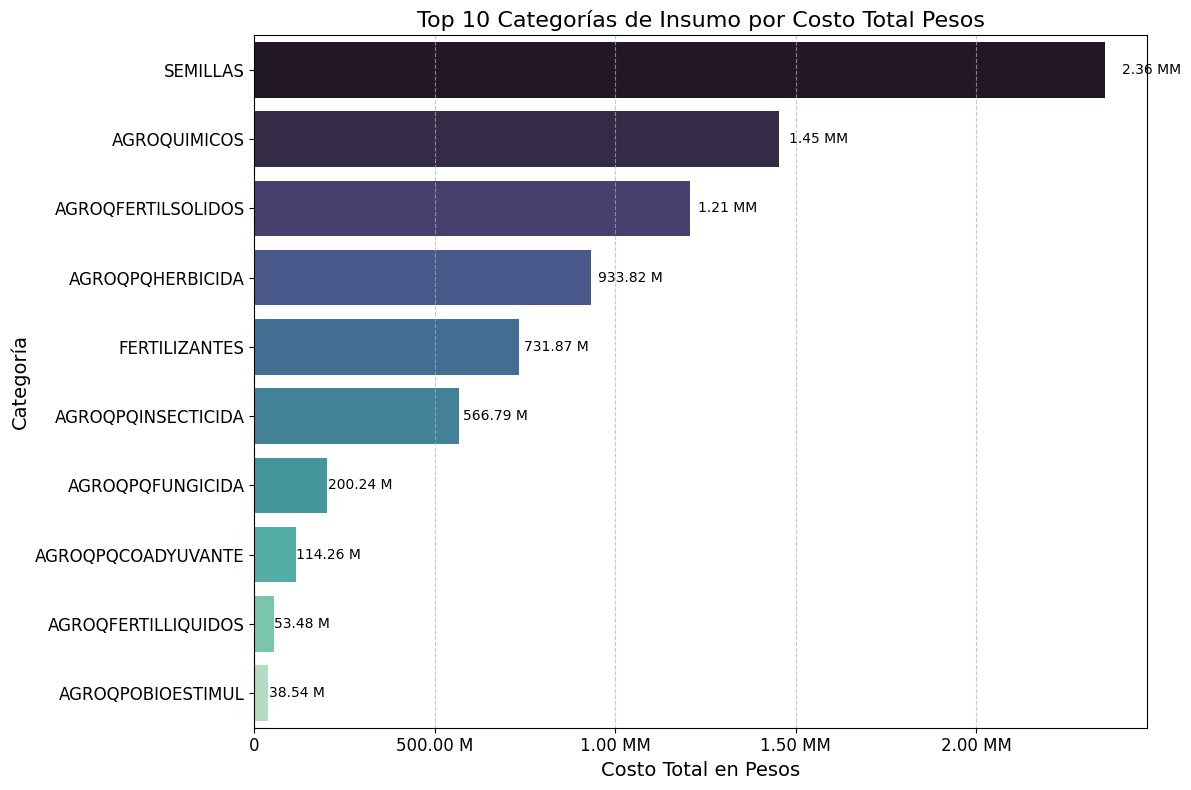


--- Análisis de Costos por Categoría de Insumo MEJORADO Completado ---


In [ ]:
# Esto afectará la impresión de la Serie 'costo_por_categoria.head(10)'
pd.options.display.float_format = '{:,.2f}'.format

print("\n--- 5. Análisis de Costos y Gastos por Categoría Clave (MEJORADO) ---")

# Agrupar por Categoria (de insumo) y sumar Costo Total Pesos
print("\nCosto Total Pesos por Categoría de Insumo:")
if 'Costo Total Pesos' in df_2.columns and 'Categoria' in df_2.columns:
    costo_por_categoria = df_2.groupby('Categoria')['Costo Total Pesos'].sum().sort_values(ascending=False)
    print(costo_por_categoria.head(10)) # Esto ahora debería imprimirse sin notación científica

    plt.figure(figsize=(12, 8)) # Aumentar el tamaño para mejor visibilidad

    sns.barplot(x=costo_por_categoria.head(10).values,
                y=costo_por_categoria.head(10).index,
                palette='mako') # Mantuvimos la paleta 'mako' que usaste

    plt.title('Top 10 Categorías de Insumo por Costo Total Pesos', fontsize=16)
    plt.xlabel('Costo Total en Pesos', fontsize=14) # Etiqueta del eje X
    plt.ylabel('Categoría', fontsize=14)

    # --- Mejora del Eje X: Formato de los números grandes ---
    # Define la misma función para formatear los números a millones/miles de millones (M/MM)
    def format_money_units(x, pos):
        if x >= 1e9: # Si es mayor o igual a mil millones
            return f'{x * 1e-9:.2f} MM' # Formatea como "X.YY MM" (miles de millones)
        elif x >= 1e6: # Si es mayor o igual a un millón
            return f'{x * 1e-6:.2f} M' # Formatea como "X.YY M" (millones)
        else:
            return f'{x:.0f}' # Para números más pequeños, sin decimales o en su escala original

    formatter = FuncFormatter(format_money_units)
    plt.gca().xaxis.set_major_formatter(formatter)

    # --- Añadir valores numéricos en las barras ---
    for i, (costo, categoria) in enumerate(zip(costo_por_categoria.head(10).values, costo_por_categoria.head(10).index)):
        # Ajusta la posición del texto para que no se superponga
        plt.text(costo * 1.02, # Un 2% más allá de la barra
                 i, # El índice 'i' corresponde a la posición de la barra en el eje Y
                 format_money_units(costo, None), # Usa la misma función de formateo para el texto
                 color='black', ha="left", va='center', fontsize=10)


    plt.xticks(fontsize=12) # Aumentar el tamaño de los ticks del eje X
    plt.yticks(fontsize=12) # Aumentar el tamaño de los ticks del eje Y

    plt.grid(axis='x', linestyle='--', alpha=0.7) # Mantiene la cuadrícula
    plt.tight_layout() # Ajusta el diseño
    plt.show()

else:
    print("Columnas 'Costo Total Pesos' o 'Categoria' no encontradas para este análisis.")

print("\n--- Análisis de Costos por Categoría de Insumo MEJORADO Completado ---")


--- 7. Relación entre Hectáreas y Costos/Gastos ---


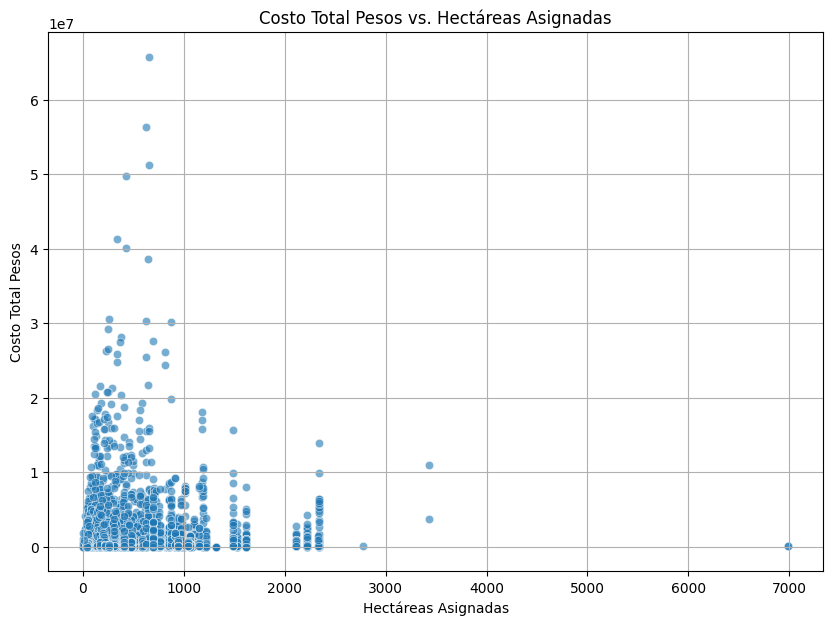

In [ ]:
# --- 7. Relación entre Hectáreas y Costos/Gastos ---
print("\n--- 7. Relación entre Hectáreas y Costos/Gastos ---")

# Verificar si 'Ha Asignadas' y 'Costo Total Pesos' existen
if 'Ha Asignadas' in df_2.columns and 'Costo Total Pesos' in df_2.columns:
    # Gráfico de dispersión (Scatter Plot) de Costo Total vs. Ha Asignadas
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x='Ha Asignadas', y='Costo Total Pesos', data=df_2, alpha=0.6)
    plt.title('Costo Total Pesos vs. Hectáreas Asignadas')
    plt.xlabel('Hectáreas Asignadas')
    plt.ylabel('Costo Total Pesos')
    plt.grid(True)
    plt.show()

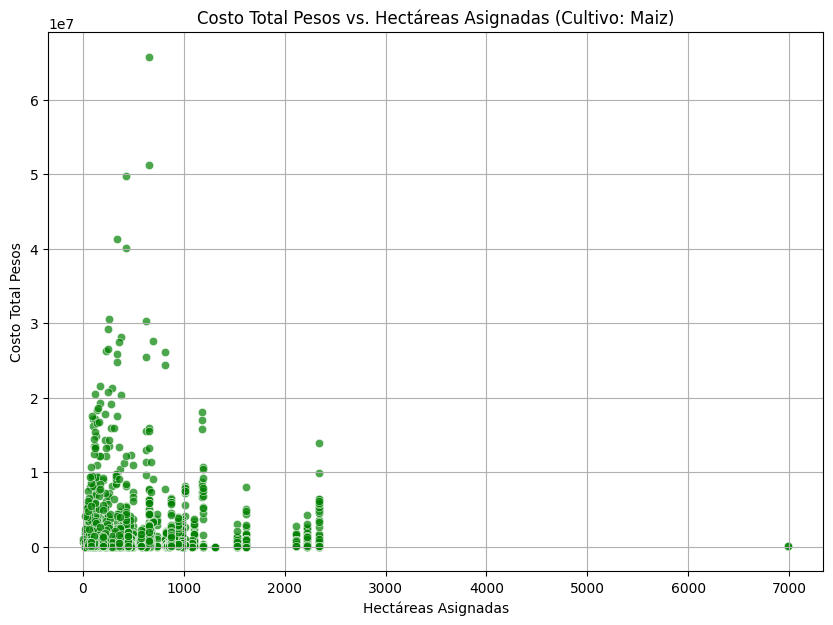

In [ ]:
# --- ASEGURAR QUE COLUMNAS CLAVE SEAN NUMÉRICAS Y NO TENGAN NaN PARA GRAFICAR ---
# Es una buena práctica asegurar los tipos de datos y manejar NaNs ANTES de graficar.
# .dropna() aquí es solo para las filas que se van a graficar.
df_plot = df_2.copy() # Trabaja en una copia para no alterar el df_2 original para otros usos

# Convertir a numérico, forzando errores a NaN y luego eliminando esos NaNs para el gráfico
df_plot['Ha Asignadas'] = pd.to_numeric(df_plot['Ha Asignadas'], errors='coerce')
df_plot['Costo Total Pesos'] = pd.to_numeric(df_plot['Costo Total Pesos'], errors='coerce')
df_plot.dropna(subset=['Ha Asignadas', 'Costo Total Pesos', 'Cultivo'], inplace=True)


# --- Gráfico para MAIZ ---
df_maiz = df_plot[df_plot['Cultivo'] == 'Maiz']
if not df_maiz.empty:
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x='Ha Asignadas', y='Costo Total Pesos', data=df_maiz, alpha=0.7, color='green')
    plt.title('Costo Total Pesos vs. Hectáreas Asignadas (Cultivo: Maiz)')
    plt.xlabel('Hectáreas Asignadas')
    plt.ylabel('Costo Total Pesos')
    plt.grid(True)
    plt.show()
else:
    print("No hay datos para 'Maiz' o datos válidos para graficar en las columnas seleccionadas.")


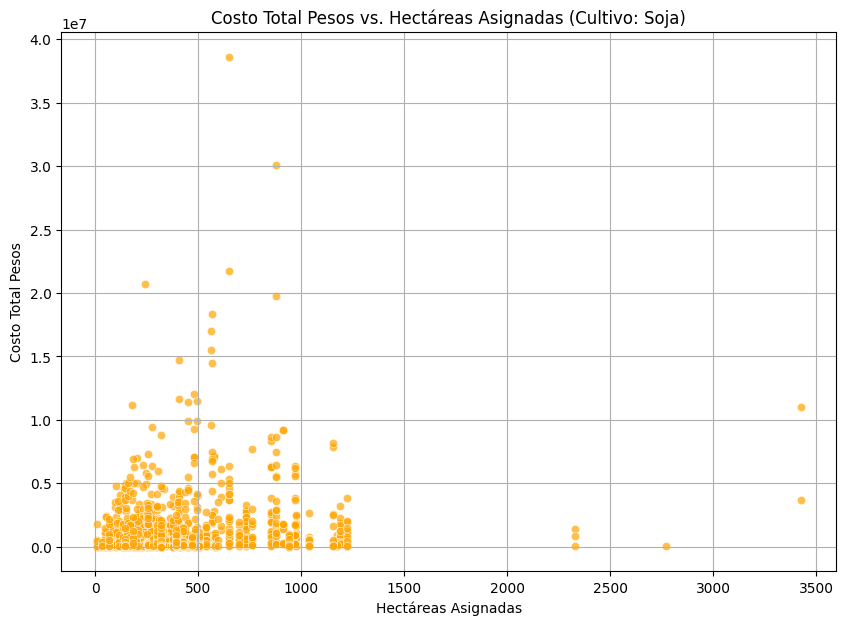

In [ ]:
# --- Gráfico para SOJA ---
df_soja = df_plot[df_plot['Cultivo'] == 'Soja']
if not df_soja.empty:
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x='Ha Asignadas', y='Costo Total Pesos', data=df_soja, alpha=0.7, color='orange')
    plt.title('Costo Total Pesos vs. Hectáreas Asignadas (Cultivo: Soja)')
    plt.xlabel('Hectáreas Asignadas')
    plt.ylabel('Costo Total Pesos')
    plt.grid(True)
    plt.show()
else:
    print("No hay datos para 'Soja' o datos válidos para graficar en las columnas seleccionadas.")

# Seleccion de variables relevantes para los modelos

--- Generando Matriz de Correlación Simplificada ---


<ipython-input-123-4a5345389ebb>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_for_corr[col].replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-123-4a5345389ebb>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

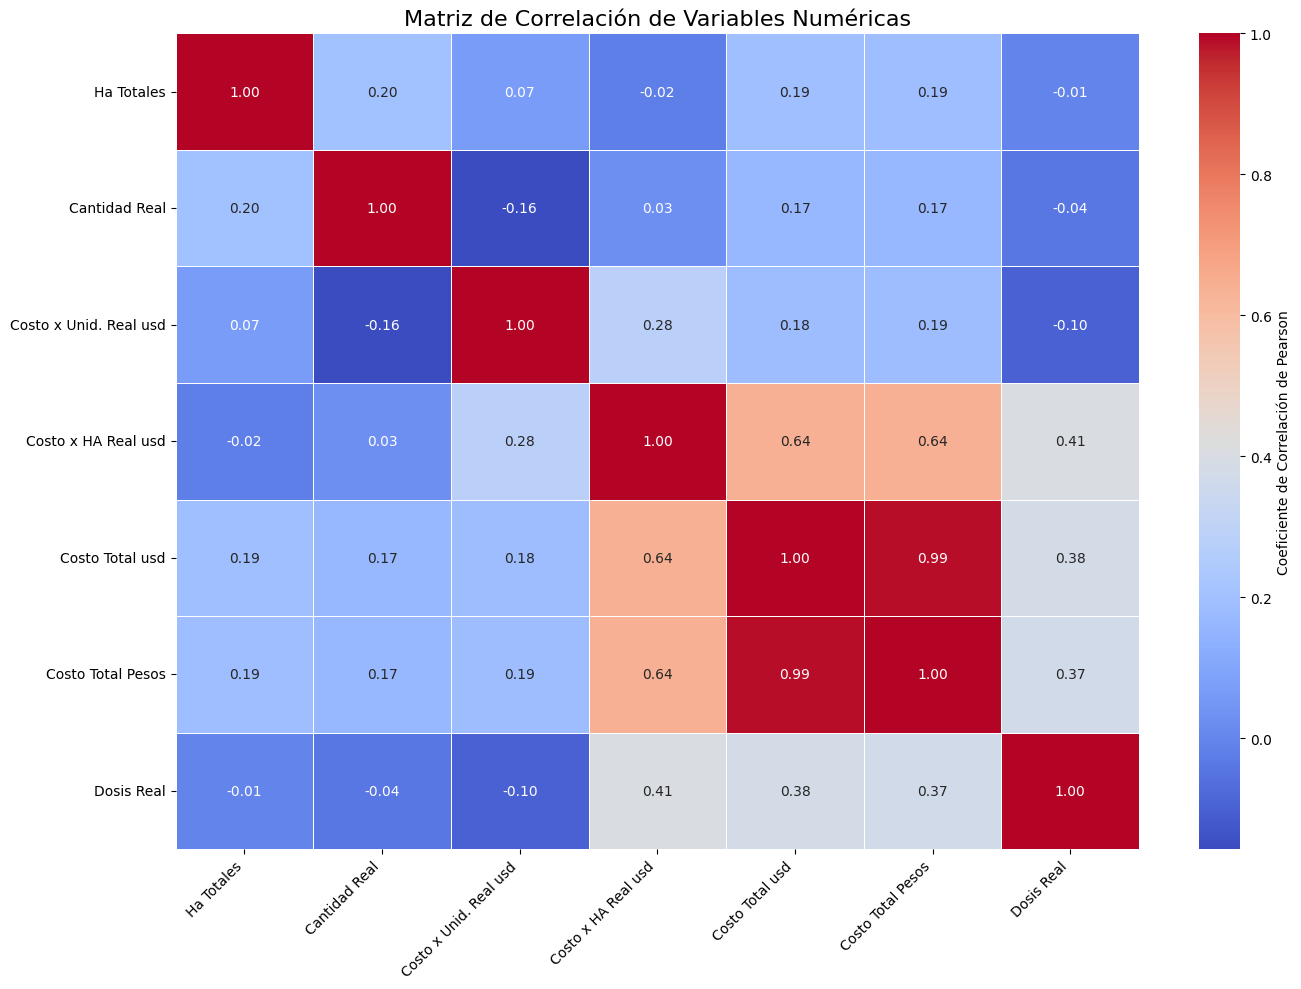


--- Matriz de Correlación Generada ---


In [ ]:
numeric_cols_for_corr = [
    'Ha Totales', 'Cantidad Real', 'Costo x Unid. Real usd',
    'Costo x HA Real usd', 'Costo Total usd',
    'Costo Total Pesos', 'Dosis Real'
]

print("--- Generando Matriz de Correlación Simplificada ---")

# Filtrar df_2 para solo las columnas deseadas y asegurarlas como numéricas
# Se imputan los NaNs con la mediana para el cálculo de correlación
df_for_corr = df_2[numeric_cols_for_corr].copy()

for col in df_for_corr.columns:
    df_for_corr[col] = pd.to_numeric(df_for_corr[col], errors='coerce')
    df_for_corr[col].replace([np.inf, -np.inf], np.nan, inplace=True)
    if df_for_corr[col].isnull().any():
        median_val = df_for_corr[col].median()
        df_for_corr[col].fillna(median_val, inplace=True)
        # print(f" - Imputados NaNs en '{col}' con la mediana para correlación.") # Puedes descomentar para ver la imputación


# Calcular la matriz de correlación de Pearson
correlation_matrix = df_for_corr.corr(method='pearson')

# Visualizar la matriz de correlación con un Heatmap
plt.figure(figsize=(14, 10)) # Tamaño de figura ligeramente ajustado
sns.heatmap(
    correlation_matrix,
    annot=True,         # Mostrar los valores de correlación
    cmap='coolwarm',    # Esquema de color: rojo para negativo, azul para positivo
    fmt=".2f",          # Formato de los números a 2 decimales
    linewidths=.5,      # Líneas entre celdas
    cbar_kws={'label': 'Coeficiente de Correlación de Pearson'}
)
plt.title('Matriz de Correlación de Variables Numéricas', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10) # Rotar y ajustar tamaño de etiquetas del eje X
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout() # Ajusta el diseño
plt.show()

print("\n--- Matriz de Correlación Generada ---")

## Preparacion de los datos antes de aplicar los modelos

In [ ]:
from sklearn.model_selection import train_test_split # ¡Esta es la importación que faltaba!
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
print("--- Preparando Datos para el Modelo de Regresión Lineal (Sin Variables Categóricas) ---")

# --- 1. Definición de la Variable Objetivo y Variables Predictoras ---
target_variable = 'Dosis Real'

# Variables numéricas seleccionadas
numeric_features = [
    'Cantidad Real',
    'Ha Totales',
    'Costo x Unid. Real usd',
    'TC_imputado_por_ot',
    'Costo_Total_USD_por_Ha_Lote_Linea'
]

date_feature = 'Fecha Inicio' # Columna de fecha original


# --- 2. Limpieza y preparación general de las columnas ---

# Asegurar que la variable objetivo sea numérica y sin nulos
if target_variable not in df_2.columns:
    print(f"ERROR: La variable objetivo '{target_variable}' no se encontró en df_2. No se puede continuar.")
    exit()
df_2[target_variable] = pd.to_numeric(df_2[target_variable], errors='coerce')
if df_2[target_variable].isnull().any():
    median_target = df_2[target_variable].median()
    df_2[target_variable].fillna(median_target, inplace=True)
    print(f"Nulos en '{target_variable}' rellenados con la mediana: {median_target}")


# Limpieza de variables numéricas predictoras
numeric_features_to_use = [] # Nueva lista para las numéricas que sí existen
for col in numeric_features:
    if col in df_2.columns:
        df_2[col] = pd.to_numeric(df_2[col], errors='coerce')
        df_2[col].replace([np.inf, -np.inf], np.nan, inplace=True)
        if df_2[col].isnull().any():
            median_val = df_2[col].median()
            df_2[col].fillna(median_val, inplace=True)
            # print(f"Nulos en '{col}' rellenados con la mediana: {median_val}")
        numeric_features_to_use.append(col) # Añadir solo si la columna existe
    else:
        print(f"ADVERTENCIA: La columna numérica '{col}' no se encontró en df_2 y será omitida.")
numeric_features = numeric_features_to_use # Actualizar la lista


# --- 3. Extracción de características de fecha (Mes de aplicación) ---
if date_feature in df_2.columns:
    df_2[date_feature] = pd.to_datetime(df_2[date_feature], errors='coerce')
    df_2['Mes_aplicacion'] = df_2[date_feature].dt.month
    if df_2['Mes_aplicacion'].isnull().any():
        moda_mes = df_2['Mes_aplicacion'].mode()[0]
        df_2['Mes_aplicacion'].fillna(moda_mes, inplace=True)
        print(f"Nulos en 'Mes_aplicacion' rellenados con la moda: {int(moda_mes)}")
    numeric_features.append('Mes_aplicacion')
    print(f"Característica 'Mes_aplicacion' extraída de '{date_feature}'.")
else:
    print(f"ADVERTENCIA: La columna de fecha '{date_feature}' no se encontró. No se extrajo 'Mes_aplicacion'.")


# Ahora X solo contendrá las características numéricas
X = df_2[numeric_features].copy() # Solo usamos las características numéricas
Y = df_2[target_variable]

print(f"\nDimensiones de las características (X): {X.shape}")
print(f"Dimensiones de la variable objetivo (Y): {Y.shape}")
print(f"Columnas finales de características: {X.columns.tolist()}")

# --- 6. División de Datos (Train-Test Split) ---
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f"\nConjunto de Entrenamiento (X_train): {X_train.shape[0]} filas")
print(f"Conjunto de Prueba (X_test): {X_test.shape[0]} filas")

--- Preparando Datos para el Modelo de Regresión Lineal (Sin Variables Categóricas) ---
ADVERTENCIA: La columna numérica 'Costo_Total_USD_por_Ha_Lote_Linea' no se encontró en df_2 y será omitida.
Nulos en 'Mes_aplicacion' rellenados con la moda: 6
Característica 'Mes_aplicacion' extraída de 'Fecha Inicio'.

Dimensiones de las características (X): (6961, 5)
Dimensiones de la variable objetivo (Y): (6961,)
Columnas finales de características: ['Cantidad Real', 'Ha Totales', 'Costo x Unid. Real usd', 'TC_imputado_por_ot', 'Mes_aplicacion']

Conjunto de Entrenamiento (X_train): 5568 filas
Conjunto de Prueba (X_test): 1393 filas


<ipython-input-124-c66c657c474d>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2[target_variable] = pd.to_numeric(df_2[target_variable], errors='coerce')
<ipython-input-124-c66c657c474d>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2[col] = pd.to_numeric(df_2[col], errors='coerce')
<ipython-input-124-c66c657c474d>:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This in

# Regresion lineal

## MODELO PREDICTIVO

In [ ]:
#--Entrenamiento del Modelo de Regresión Lineal ---
print("\n--- Entrenando el Modelo de Regresión Lineal ---")
model = LinearRegression()
model.fit(X_train, Y_train)
print("¡Modelo de Regresión Lineal entrenado con éxito!")

# --- 8. Evaluación del Modelo ---
print("\n--- Evaluando el Modelo ---")

# Realizar predicciones en el conjunto de prueba
Y_pred = model.predict(X_test)

# Calcular el Error Cuadrático Medio (Mean Squared Error - MSE)
# Mide el promedio de los cuadrados de los errores. Un valor más bajo es mejor.
mse = mean_squared_error(Y_test, Y_pred)
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")

# Calcular el Coeficiente de Determinación (R-cuadrado)
# Mide la proporción de la varianza en la variable dependiente que es predecible a partir de las variables independientes.
# Rango de 0 a 1, donde 1 es un ajuste perfecto.
r2 = r2_score(Y_test, Y_pred)
print(f"Coeficiente de Determinación (R-cuadrado): {r2:.4f}")


--- Entrenando el Modelo de Regresión Lineal ---
¡Modelo de Regresión Lineal entrenado con éxito!

--- Evaluando el Modelo ---
Error Cuadrático Medio (MSE): 299.3877
Coeficiente de Determinación (R-cuadrado): 0.0205



--- Generando Gráficos de Resultados del Modelo de Regresión Lineal ---


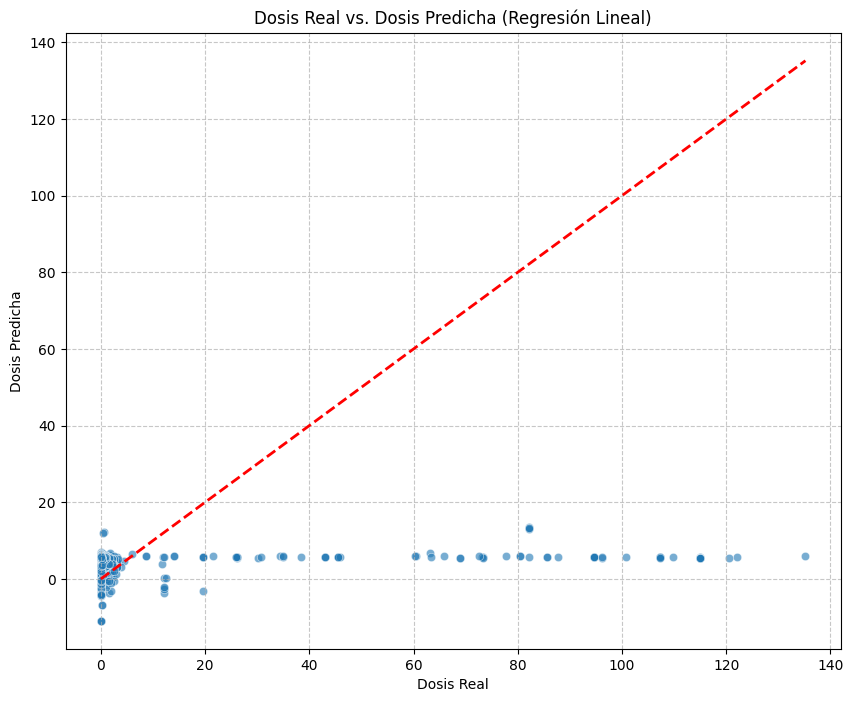

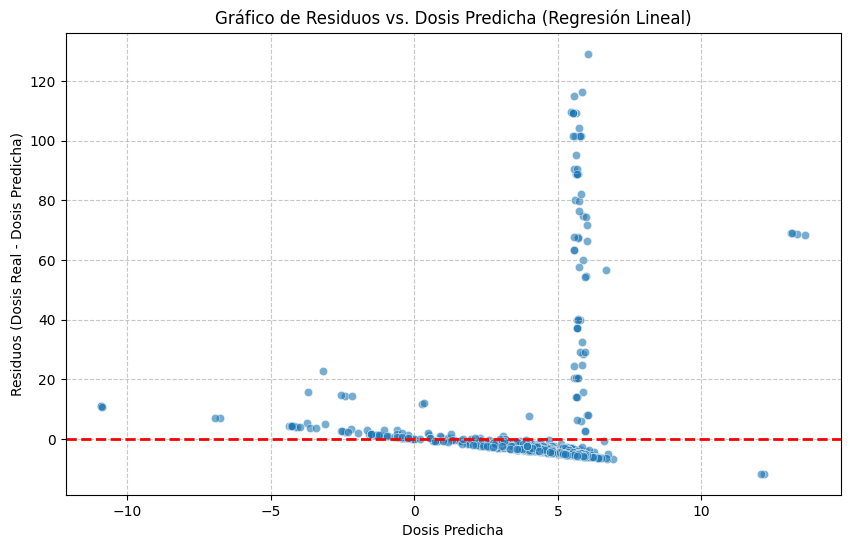

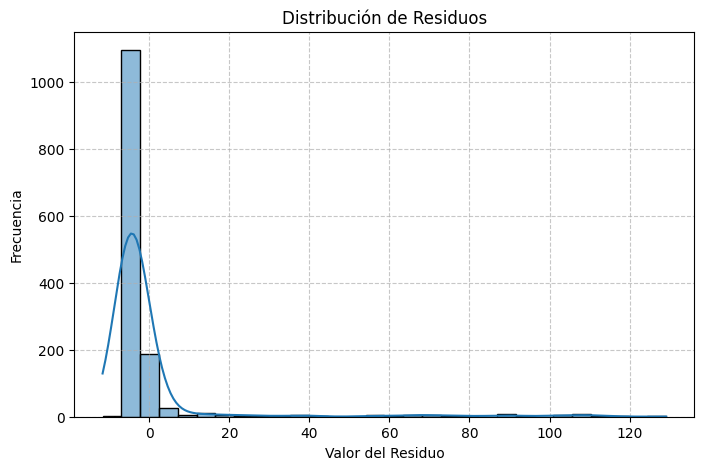


--- Visualizaciones de Resultados Completadas ---


In [ ]:
print("\n--- Generando Gráficos de Resultados del Modelo de Regresión Lineal ---")

# 1. Gráfico de Predicciones vs. Valores Reales
plt.figure(figsize=(10, 8))
sns.scatterplot(x=Y_test, y=Y_pred, alpha=0.6) # alpha para ver la densidad de puntos
# Línea ideal donde Predicción == Real (y=x)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
plt.xlabel("Dosis Real")
plt.ylabel("Dosis Predicha")
plt.title("Dosis Real vs. Dosis Predicha (Regresión Lineal)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 2. Gráfico de Residuos (Errores de Predicción) vs. Predicciones
residuals = Y_test - Y_pred # Residuos = Valores Reales - Valores Predichos

plt.figure(figsize=(10, 6))
sns.scatterplot(x=Y_pred, y=residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', lw=2) # Línea de cero error
plt.xlabel("Dosis Predicha")
plt.ylabel("Residuos (Dosis Real - Dosis Predicha)")
plt.title("Gráfico de Residuos vs. Dosis Predicha (Regresión Lineal)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 3. Histograma de Residuos
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel("Valor del Residuo")
plt.ylabel("Frecuencia")
plt.title("Distribución de Residuos")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

print("\n--- Visualizaciones de Resultados Completadas ---")

In [ ]:
print("--- Creando DataFrame de Valores Observados vs. Predichos ---")

y_test_series = pd.Series(Y_test).reset_index(drop=True)
y_pred_series = pd.Series(Y_pred) # Y_pred ya suele ser un array numpy, convertirlo a Serie

# Crear el DataFrame
df_resultados = pd.DataFrame({
    'Dosis_Real': y_test_series,
    'Dosis_Predicha': y_pred_series
})

# Opcional: Calcular el error (residuo) para cada predicción
df_resultados['Error'] = df_resultados['Dosis_Real'] - df_resultados['Dosis_Predicha']

#Calcular el error absoluto para ver la magnitud sin signo
df_resultados['Error_Absoluto'] = np.abs(df_resultados['Error'])

# Mostrar las primeras filas del DataFrame de resultados
print("Primeras 10 filas del DataFrame de resultados:")
print(df_resultados.head(10))

# Mostrar algunas estadísticas descriptivas del DataFrame de resultados
print("\nEstadísticas descriptivas de los resultados:")
print(df_resultados.describe())

# Puedes ordenar el DataFrame por la dosis real o por el error para analizarlo mejor
# Por ejemplo, para ver las mayores desviaciones:
print("\nFilas con los mayores errores absolutos:")
print(df_resultados.sort_values(by='Error_Absoluto', ascending=False).head(10))

print("\n--- DataFrame de Resultados Creado Exitosamente ---")

--- Creando DataFrame de Valores Observados vs. Predichos ---
Primeras 10 filas del DataFrame de resultados:
   Dosis_Real  Dosis_Predicha  Error  Error_Absoluto
0        0.30            5.74  -5.44            5.44
1        0.31            5.56  -5.25            5.25
2        0.59            5.61  -5.02            5.02
3        1.76            2.91  -1.15            1.15
4        2.00            4.79  -2.79            2.79
5       11.80            4.00   7.80            7.80
6       85.61            5.60  80.01           80.01
7        0.07            5.75  -5.68            5.68
8       12.13            0.28  11.85           11.85
9        0.26            5.72  -5.46            5.46

Estadísticas descriptivas de los resultados:
       Dosis_Real  Dosis_Predicha    Error  Error_Absoluto
count    1,393.00        1,393.00 1,393.00        1,393.00
mean         4.32            4.61    -0.29            7.48
std         17.49            2.08    17.31           15.61
min          0.00         

In [ ]:
print("--- Filas con los menores errores (mejores predicciones) ---")

# Ordenar el DataFrame por 'Error_Absoluto' de forma ascendente (menor a mayor error)
# y mostrar las primeras 10 filas.
print(df_resultados.sort_values(by='Error_Absoluto', ascending=True).head(10))

print("\n--- Análisis de Mejores Predicciones Completado ---")

--- Filas con los menores errores (mejores predicciones) ---
      Dosis_Real  Dosis_Predicha  Error  Error_Absoluto
1136        3.03            2.99   0.04            0.04
600         0.03           -0.02   0.05            0.05
956         0.07           -0.01   0.08            0.08
1117        1.80            1.68   0.12            0.12
997         0.07            0.19  -0.12            0.12
627         2.05            2.18  -0.13            0.13
669         0.06           -0.07   0.13            0.13
858         3.03            3.17  -0.14            0.14
1162        2.12            1.97   0.15            0.15
1082        0.72            0.55   0.17            0.17

--- Análisis de Mejores Predicciones Completado ---


## CROSS VALIDATION

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score, KFold # Importar KFold también es útil

print("\n--- Realizando Validación Cruzada para el Modelo de Regresión Lineal ---")

# Define el modelo de Regresión Lineal
model_cv = LinearRegression()

# Define la estrategia de validación cruzada.
cv_strategy = KFold(n_splits=5, shuffle=True, random_state=42)

# Realiza la validación cruzada.

r2_scores_cv = cross_val_score(model_cv, X, Y, cv=cv_strategy, scoring='r2', n_jobs=-1)
mse_scores_cv = cross_val_score(model_cv, X, Y, cv=cv_strategy, scoring='neg_mean_squared_error', n_jobs=-1)

# cross_val_score para MSE devuelve valores negativos porque es una función de "score"
# y sklearn asume que un score más alto es mejor. Para obtener el MSE real, se toma el valor absoluto.
mse_scores_cv = -mse_scores_cv

print(f"Scores R-cuadrado (CV): {r2_scores_cv}")
print(f"R-cuadrado Promedio (CV): {np.mean(r2_scores_cv):.4f}")
print(f"Desviación Estándar del R-cuadrado (CV): {np.std(r2_scores_cv):.4f}")

print(f"\nScores MSE (CV): {mse_scores_cv}")
print(f"MSE Promedio (CV): {np.mean(mse_scores_cv):.4f}")
print(f"Desviación Estándar del MSE (CV): {np.std(mse_scores_cv):.4f}")

print("\nValidación Cruzada completada.")



--- Realizando Validación Cruzada para el Modelo de Regresión Lineal ---
Scores R-cuadrado (CV): [0.02050989 0.00770333 0.0073025  0.01151173 0.01315681]
R-cuadrado Promedio (CV): 0.0120
Desviación Estándar del R-cuadrado (CV): 0.0048

Scores MSE (CV): [299.38774956 386.03970906 401.56459669 218.96046776 298.06675193]
MSE Promedio (CV): 320.8039
Desviación Estándar del MSE (CV): 66.5217

Validación Cruzada completada.


# Random Forest

## MODELO PREDICTIVO

In [ ]:
print("--- Preparando Datos para el Modelo de Random forest ---")

# --- 1. Definición de la Variable Objetivo y Variables Predictoras ---
target_variable = 'Dosis Real'

# Variables numéricas seleccionadas
numeric_features = [
    'Cantidad Real',
    'Ha Totales',
    'Costo x Unid. Real usd',
    'TC_imputado_por_ot',
    'Costo_Total_USD_por_Ha_Lote_Linea'
]

# Variables categóricas seleccionadas (asegúrate de la exactitud de los nombres de columna)
categorical_features = [
    'Cultivo',
    'Establecimiento',
    'Lote',
    'Insumo', # O 'Cod. SAP' si decidiste usarlo
    'U. Medida',
    'Categoria'
]

# Variable de fecha para extraer característica
date_feature = 'Fecha Inicio' # Columna de fecha original


# --- 2. Limpieza y preparación general de las columnas ---

# Asegurar que la variable objetivo sea numérica y sin nulos (se rellenan con la mediana)
if target_variable not in df_2.columns:
    print(f"ERROR: La variable objetivo '{target_variable}' no se encontró en df_2. No se puede continuar.")
    exit()
df_2[target_variable] = pd.to_numeric(df_2[target_variable], errors='coerce')
if df_2[target_variable].isnull().any():
    median_target = df_2[target_variable].median()
    df_2[target_variable].fillna(median_target, inplace=True)
    print(f"Nulos en '{target_variable}' rellenados con la mediana: {median_target}")


# Limpieza de variables numéricas predictoras
for col in numeric_features:
    if col in df_2.columns:
        df_2[col] = pd.to_numeric(df_2[col], errors='coerce')
        df_2[col].replace([np.inf, -np.inf], np.nan, inplace=True)
        if df_2[col].isnull().any():
            median_val = df_2[col].median()
            df_2[col].fillna(median_val, inplace=True)
            # print(f"Nulos en '{col}' rellenados con la mediana: {median_val}")
    else:
        print(f"ADVERTENCIA: La columna numérica '{col}' no se encontró en df_2 y será omitida.")
        numeric_features.remove(col) # Eliminarla de la lista si no existe


# --- 3. Extracción de características de fecha (Mes de aplicación) ---
if date_feature in df_2.columns:
    # Asegurarse de que la columna de fecha esté en formato datetime
    df_2[date_feature] = pd.to_datetime(df_2[date_feature], errors='coerce')
    # Extraer el mes y añadirlo como una nueva característica numérica
    df_2['Mes_aplicacion'] = df_2[date_feature].dt.month
    # Rellenar posibles NaNs en Mes_aplicacion (si la fecha era inválida) con la moda
    if df_2['Mes_aplicacion'].isnull().any():
        moda_mes = df_2['Mes_aplicacion'].mode()[0]
        df_2['Mes_aplicacion'].fillna(moda_mes, inplace=True)
        print(f"Nulos en 'Mes_aplicacion' rellenados con la moda: {moda_mes}")
    numeric_features.append('Mes_aplicacion') # Añadirla a las características numéricas
    print(f"Característica 'Mes_aplicacion' extraída de '{date_feature}'.")
else:
    print(f"ADVERTENCIA: La columna de fecha '{date_feature}' no se encontró. No se extrajo 'Mes_aplicacion'.")

# --- 5. Combinar todas las características en el DataFrame final para el modelo ---
# Asegurarse de que todas las columnas de numeric_features existen
numeric_features_filtered = [col for col in numeric_features if col in df_2.columns]

# Unir las características numéricas y las codificadas
#X = pd.concat([df_2[numeric_features_filtered], df_encoded], axis=1)
#Y = df_2[target_variable]

print(f"\nDimensiones de las características (X): {X.shape}")
print(f"Dimensiones de la variable objetivo (Y): {Y.shape}")
print(f"Columnas finales de características: {X.columns.tolist()}")

# --- 6. División de Datos (Train-Test Split) ---
# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f"\nConjunto de Entrenamiento (X_train): {X_train.shape[0]} filas")
print(f"Conjunto de Prueba (X_test): {X_test.shape[0]} filas")


--- Preparando Datos para el Modelo de Random forest ---
ADVERTENCIA: La columna numérica 'Costo_Total_USD_por_Ha_Lote_Linea' no se encontró en df_2 y será omitida.
Nulos en 'Mes_aplicacion' rellenados con la moda: 6.0
Característica 'Mes_aplicacion' extraída de 'Fecha Inicio'.

Dimensiones de las características (X): (6961, 5)
Dimensiones de la variable objetivo (Y): (6961,)
Columnas finales de características: ['Cantidad Real', 'Ha Totales', 'Costo x Unid. Real usd', 'TC_imputado_por_ot', 'Mes_aplicacion']

Conjunto de Entrenamiento (X_train): 5568 filas
Conjunto de Prueba (X_test): 1393 filas


<ipython-input-130-f74ed4669a88>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2[target_variable] = pd.to_numeric(df_2[target_variable], errors='coerce')
<ipython-input-130-f74ed4669a88>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2[col] = pd.to_numeric(df_2[col], errors='coerce')
<ipython-input-130-f74ed4669a88>:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This in


--- Entrenando el Modelo Random Forest Regressor ---
¡Modelo Random Forest Regressor entrenado con éxito!

--- Evaluando el Modelo Random Forest ---
Error Cuadrático Medio (MSE) del Random Forest: 19.3746
Coeficiente de Determinación (R-cuadrado) del Random Forest: 0.9366

Importancia de las Características (Random Forest):
           Característica  Importancia
2  Costo x Unid. Real usd         0.72
0           Cantidad Real         0.10
1              Ha Totales         0.06
3      TC_imputado_por_ot         0.06
4          Mes_aplicacion         0.06


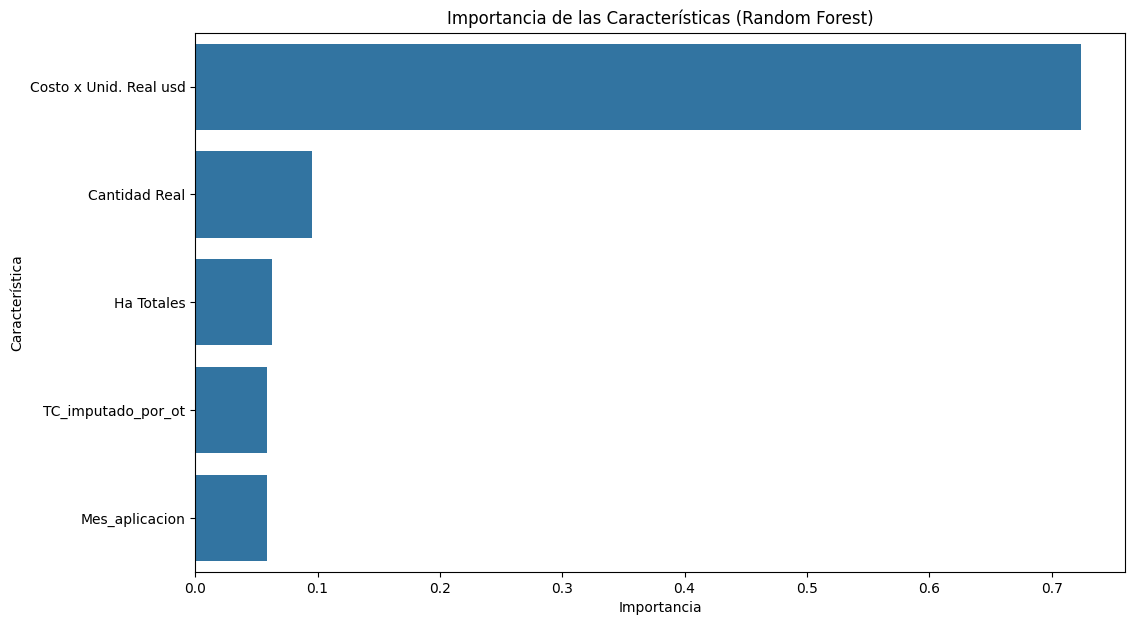


--- Generando Gráficos de Resultados del Random Forest ---


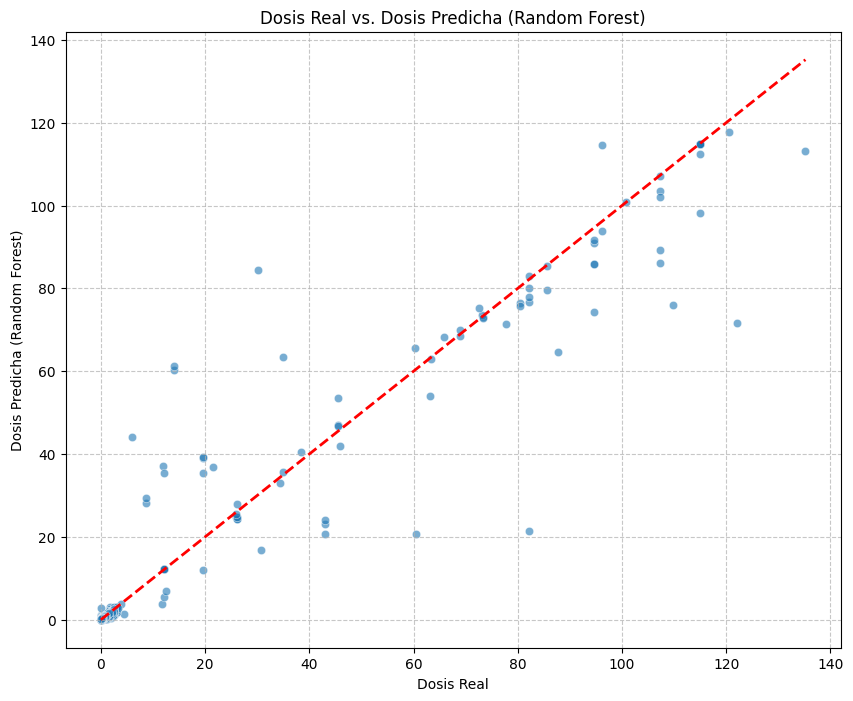

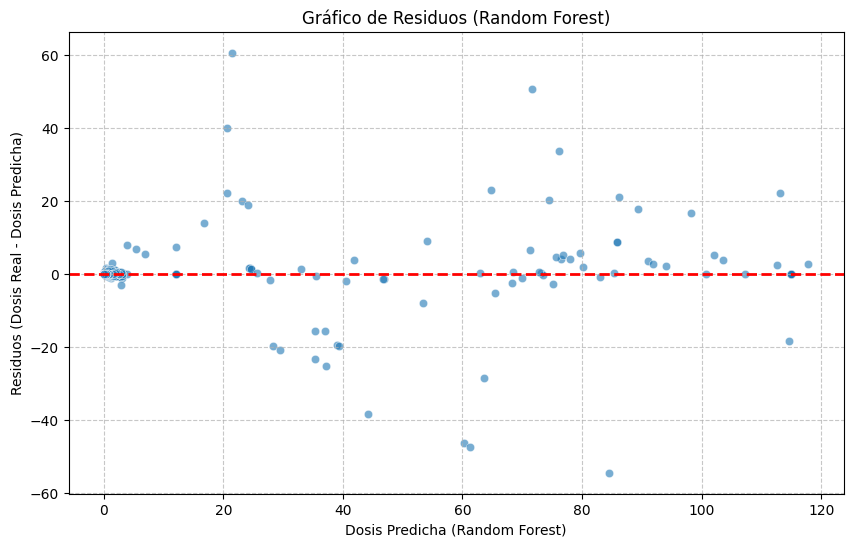

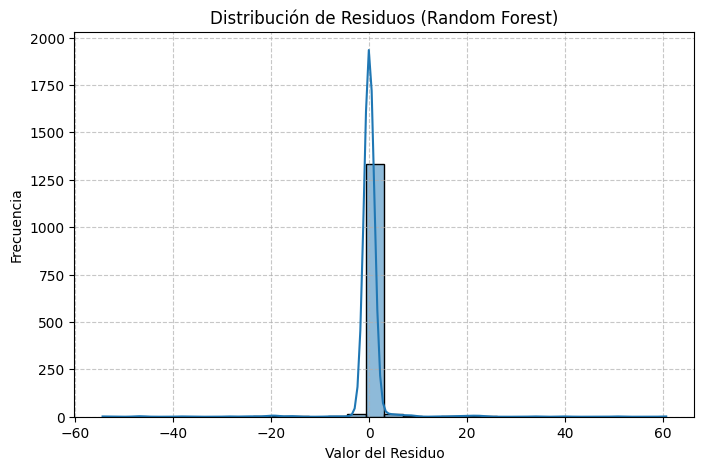


--- Proceso de Modelado con Random Forest Completado ---


In [ ]:
print("\n--- Entrenando el Modelo Random Forest Regressor ---")

rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Entrenar el modelo
rf_model.fit(X_train, Y_train)
print("¡Modelo Random Forest Regressor entrenado con éxito!")

# --- Evaluación del Modelo Random Forest ---
print("\n--- Evaluando el Modelo Random Forest ---")

# Realizar predicciones en el conjunto de prueba
Y_pred_rf = rf_model.predict(X_test)

# Calcular el Error Cuadrático Medio (MSE)
mse_rf = mean_squared_error(Y_test, Y_pred_rf)
print(f"Error Cuadrático Medio (MSE) del Random Forest: {mse_rf:.4f}")

# Calcular el Coeficiente de Determinación (R-cuadrado)
r2_rf = r2_score(Y_test, Y_pred_rf)
print(f"Coeficiente de Determinación (R-cuadrado) del Random Forest: {r2_rf:.4f}")


# --- Importancia de las Características (Feature Importance) ---
# Random Forest puede decirnos qué características fueron las más importantes
print("\nImportancia de las Características (Random Forest):")
feature_importances = pd.DataFrame({
    'Característica': X.columns,
    'Importancia': rf_model.feature_importances_
})
feature_importances = feature_importances.sort_values(by='Importancia', ascending=False)
print(feature_importances.head(10)) # Muestra las 10 características más importantes

# Opcional: Visualizar las importancias de las características
plt.figure(figsize=(12, 7))
sns.barplot(x='Importancia', y='Característica', data=feature_importances.head(15)) # Top 15
plt.title('Importancia de las Características (Random Forest)')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.show()


# --- Visualización de Predicciones del Random Forest ---
print("\n--- Generando Gráficos de Resultados del Random Forest ---")

# 1. Gráfico de Predicciones vs. Valores Reales
plt.figure(figsize=(10, 8))
sns.scatterplot(x=Y_test, y=Y_pred_rf, alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
plt.xlabel("Dosis Real")
plt.ylabel("Dosis Predicha (Random Forest)")
plt.title("Dosis Real vs. Dosis Predicha (Random Forest)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 2. Gráfico de Residuos vs. Predicciones
residuals_rf = Y_test - Y_pred_rf
plt.figure(figsize=(10, 6))
sns.scatterplot(x=Y_pred_rf, y=residuals_rf, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel("Dosis Predicha (Random Forest)")
plt.ylabel("Residuos (Dosis Real - Dosis Predicha)")
plt.title("Gráfico de Residuos (Random Forest)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 3. Histograma de Residuos
plt.figure(figsize=(8, 5))
sns.histplot(residuals_rf, kde=True, bins=30)
plt.xlabel("Valor del Residuo")
plt.ylabel("Frecuencia")
plt.title("Distribución de Residuos (Random Forest)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

print("\n--- Proceso de Modelado con Random Forest Completado ---")

## CROSS VALIDATION

In [ ]:
# --- Validación Cruzada para Random Forest ---
print("\n--- Realizando Validación Cruzada para el Modelo Random Forest ---")

# Define el modelo de Random Forest para CV (puedes usar los mismos parámetros o probar otros)
model_rf_cv = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Define la estrategia de validación cruzada.
# KFold es una opción común: divide los datos en 'n_splits' (ej. 5) pliegues.
# shuffle=True mezcla los datos antes de dividirlos, y random_state asegura reproducibilidad.
cv_strategy_rf = KFold(n_splits=5, shuffle=True, random_state=42)

# Realiza la validación cruzada para R-cuadrado
r2_scores_rf_cv = cross_val_score(model_rf_cv, X, Y, cv=cv_strategy_rf, scoring='r2', n_jobs=-1)

# Realiza la validación cruzada para MSE
mse_scores_rf_cv = cross_val_score(model_rf_cv, X, Y, cv=cv_strategy_rf, scoring='neg_mean_squared_error', n_jobs=-1)
mse_scores_rf_cv = -mse_scores_rf_cv # Convertir a valores positivos de MSE

print(f"Scores R-cuadrado (CV) para Random Forest: {r2_scores_rf_cv}")
print(f"R-cuadrado Promedio (CV) para Random Forest: {np.mean(r2_scores_rf_cv):.4f}")
print(f"Desviación Estándar del R-cuadrado (CV) para Random Forest: {np.std(r2_scores_rf_cv):.4f}")

print(f"\nScores MSE (CV) para Random Forest: {mse_scores_rf_cv}")
print(f"MSE Promedio (CV) para Random Forest: {np.mean(mse_scores_rf_cv):.4f}")
print(f"Desviación Estándar del MSE (CV) para Random Forest: {np.std(mse_scores_rf_cv):.4f}")

print("\nValidación Cruzada para Random Forest completada.")


--- Realizando Validación Cruzada para el Modelo Random Forest ---
Scores R-cuadrado (CV) para Random Forest: [0.93701455 0.87147963 0.94324145 0.90496568 0.92435794]
R-cuadrado Promedio (CV) para Random Forest: 0.9162
Desviación Estándar del R-cuadrado (CV) para Random Forest: 0.0259

Scores MSE (CV) para Random Forest: [19.25192729 49.99912679 22.95989016 21.05109258 22.84697541]
MSE Promedio (CV) para Random Forest: 27.2218
Desviación Estándar del MSE (CV) para Random Forest: 11.4691

Validación Cruzada para Random Forest completada.


# LigthGBM

## MODELO PREDICTIVO


--- Limpiando nombres de columnas para LightGBM (Versión 2) ---
Nombres de columnas limpiados y asegurada la unicidad. Ejemplos de nombres de columnas:
['CantidadReal', 'HaTotales', 'CostoxUnid.Realusd', 'TC_imputado_por_ot', 'Mes_aplicacion']

--- Entrenando el Modelo Gradient Boosting Regressor (LightGBM) ---
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000297 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 788
[LightGBM] [Info] Number of data points in the train set: 5568, number of used features: 5
[LightGBM] [Info] Start training from score 4.555411
¡Modelo LightGBM Regressor entrenado con éxito!

--- Evaluando el Modelo LightGBM ---
Error Cuadrático Medio (MSE) del LightGBM: 22.3902
Coeficiente de Determinación (R-cuadrado) del LightGBM: 0.9267

--- Comparación de Modelos ---
R-cuadrado Regresión Lineal: 0.7678
R-cuadrado Random Forest: 0.9481
R-cuadrado LightGBM: 0.9267

MSE Regresión Lin

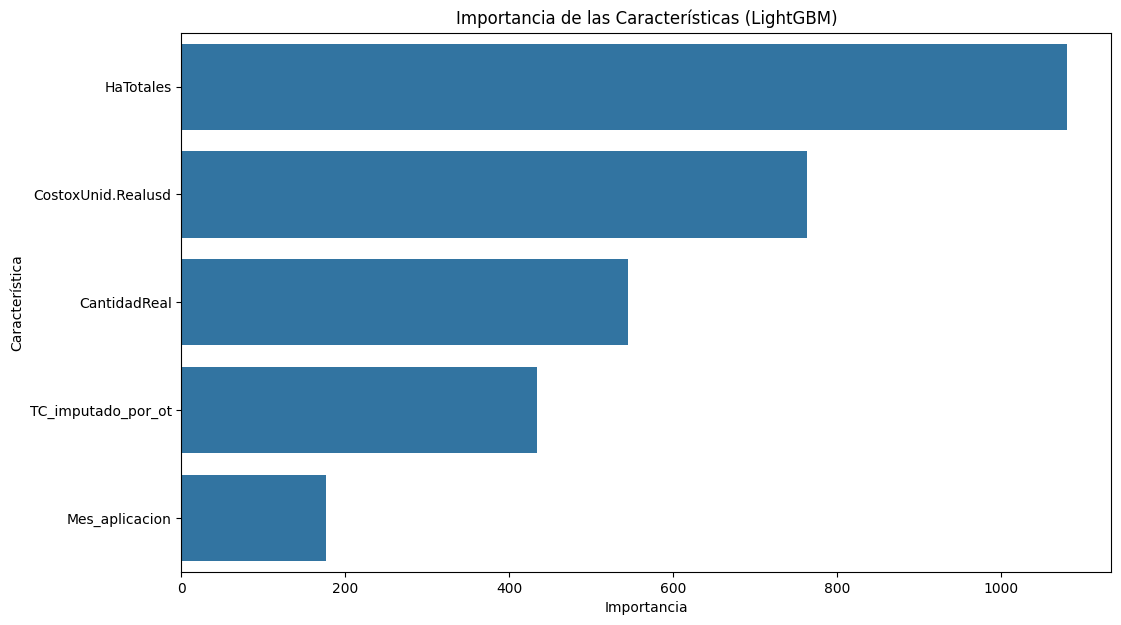


--- Generando Gráficos de Resultados del LightGBM ---


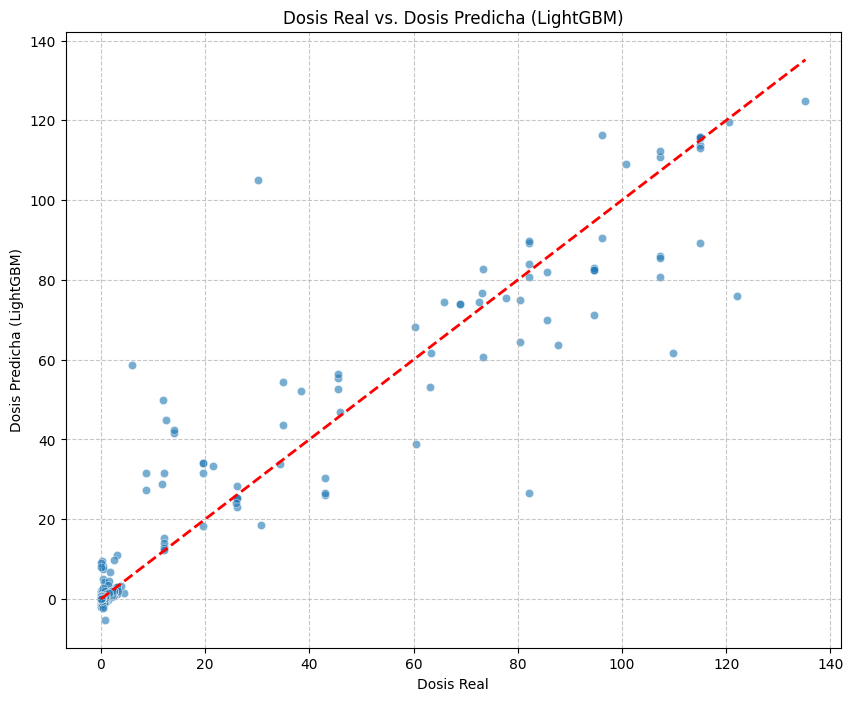

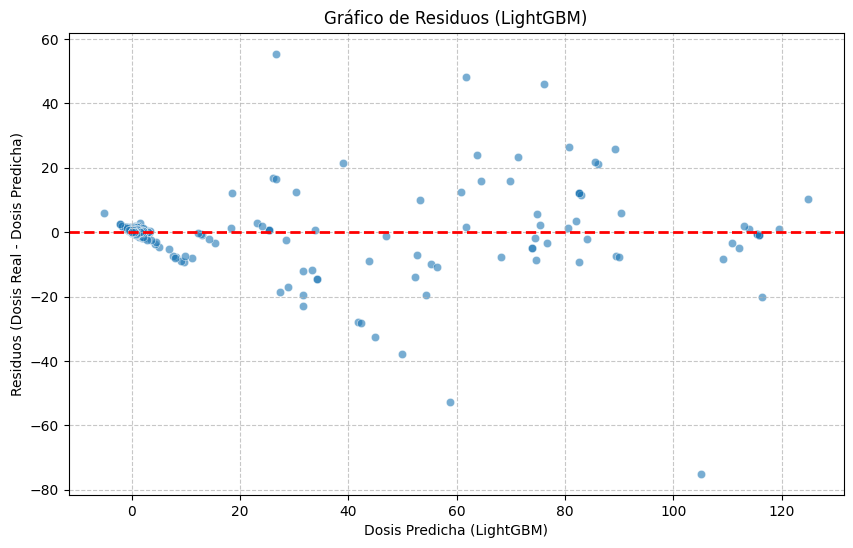

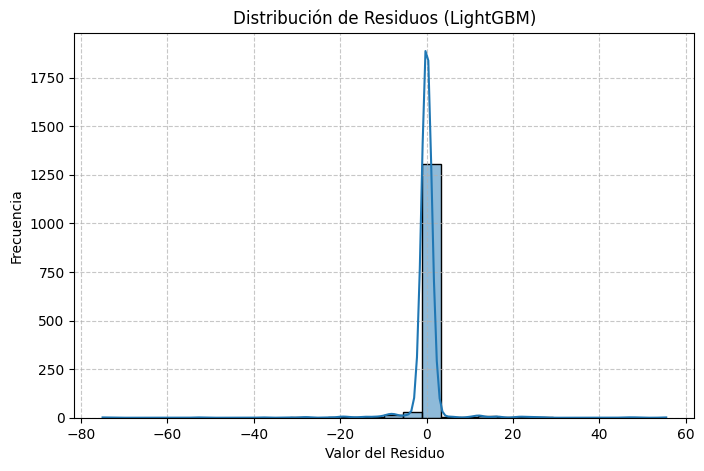


--- Proceso de Modelado con LightGBM Completado ---


In [ ]:
import re
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
print("\n--- Limpiando nombres de columnas para LightGBM (Versión 2) ---")

# Función mejorada para limpiar nombres de columnas y asegurar unicidad
def clean_col_names_unique(df):
    cols = df.columns
    new_cols = []
    seen_cols = {} # Para rastrear nombres ya vistos y sus conteos

    for col in cols:
        # Paso 1: Limpiar caracteres no deseados
        # Elimina caracteres que no sean alfanuméricos, guiones bajos, o puntos
        # LightGBM >= 3.0.0 soporta '.' en nombres, pero es mejor ser conservador
        new_col = re.sub(r'[^\w_.]', '', col)
        # Reemplazar espacios o múltiples underscores con un solo underscore
        new_col = re.sub(r'\s+', '_', new_col)
        new_col = re.sub(r'_+', '_', new_col)
        # Eliminar underscores al principio o al final
        new_col = new_col.strip('_')
        # LightGBM no le gustan ciertos caracteres en general, incluso si no son JSON "especiales"
        new_col = new_col.replace('[', '').replace(']', '').replace('<', '_LT_').replace('>', '_GT_').replace(',', '')

        # Paso 2: Asegurar la unicidad de los nombres de columnas
        original_new_col = new_col
        count = seen_cols.get(original_new_col, 0)
        while new_col in new_cols: # Si el nombre ya está en nuestra lista de nuevos nombres
            count += 1
            new_col = f"{original_new_col}_{count}"
        seen_cols[original_new_col] = count # Actualizar el conteo para el nombre base
        new_cols.append(new_col) # Añadir el nombre único a la lista

    # Asegurarse de que no haya nombres vacíos si alguna columna se limpia a nada
    # Esto es una medida de seguridad, poco probable si tienes datos sensatos
    new_cols = [f"col_{i}" if not name else name for i, name in enumerate(new_cols)]

    df.columns = new_cols
    return df

# Aplicar la limpieza a X_train y X_test
X_train_cleaned = clean_col_names_unique(X_train.copy())
X_test_cleaned = clean_col_names_unique(X_test.copy())

print("Nombres de columnas limpiados y asegurada la unicidad. Ejemplos de nombres de columnas:")
print(X_train_cleaned.columns[:10].tolist()) # Mostrar los primeros 10 nombres de columnas limpios

print("\n--- Entrenando el Modelo Gradient Boosting Regressor (LightGBM) ---")

# Inicializar el modelo LightGBM Regressor
lgbm_model = lgb.LGBMRegressor(objective='regression', n_estimators=100, learning_rate=0.1, random_state=42)

# Entrenar el modelo con los DataFrames de características limpiados
lgbm_model.fit(X_train_cleaned, Y_train)
print("¡Modelo LightGBM Regressor entrenado con éxito!")

# --- Evaluación del Modelo LightGBM ---
print("\n--- Evaluando el Modelo LightGBM ---")

# Realizar predicciones en el conjunto de prueba con los datos limpios
Y_pred_lgbm = lgbm_model.predict(X_test_cleaned)

# Calcular el Error Cuadrático Medio (MSE)
mse_lgbm = mean_squared_error(Y_test, Y_pred_lgbm)
print(f"Error Cuadrático Medio (MSE) del LightGBM: {mse_lgbm:.4f}")

# Calcular el Coeficiente de Determinación (R-cuadrado)
r2_lgbm = r2_score(Y_test, Y_pred_lgbm)
print(f"Coeficiente de Determinación (R-cuadrado) del LightGBM: {r2_lgbm:.4f}")

# --- Comparación con Random Forest y Regresión Lineal ---
print(f"\n--- Comparación de Modelos ---")
# Usamos los valores anteriores que confirmamos
print(f"R-cuadrado Regresión Lineal: {0.7678:.4f}")
print(f"R-cuadrado Random Forest: {0.9481:.4f}")
print(f"R-cuadrado LightGBM: {r2_lgbm:.4f}")

print(f"\nMSE Regresión Lineal: {70.9700:.4f}")
print(f"MSE Random Forest: {15.8747:.4f}")
print(f"MSE LightGBM: {mse_lgbm:.4f}")

# --- Importancia de las Características (Feature Importance) de LightGBM ---
print("\nImportancia de las Características (LightGBM):")
# Asegurarse de usar las columnas limpias para la importancia
feature_importances_lgbm = pd.DataFrame({
    'Característica': X_train_cleaned.columns, # Usar las columnas limpias
    'Importancia': lgbm_model.feature_importances_
})
feature_importances_lgbm = feature_importances_lgbm.sort_values(by='Importancia', ascending=False)
print(feature_importances_lgbm.head(10)) # Muestra las 10 características más importantes

# Opcional: Visualizar las importancias de las características de LightGBM
plt.figure(figsize=(12, 7))
sns.barplot(x='Importancia', y='Característica', data=feature_importances_lgbm.head(15)) # Top 15
plt.title('Importancia de las Características (LightGBM)')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.show()

# --- Visualización de Predicciones del LightGBM ---
print("\n--- Generando Gráficos de Resultados del LightGBM ---")

# 1. Gráfico de Predicciones vs. Valores Reales
plt.figure(figsize=(10, 8))
sns.scatterplot(x=Y_test, y=Y_pred_lgbm, alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
plt.xlabel("Dosis Real")
plt.ylabel("Dosis Predicha (LightGBM)")
plt.title("Dosis Real vs. Dosis Predicha (LightGBM)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 2. Gráfico de Residuos vs. Predicciones
residuals_lgbm = Y_test - Y_pred_lgbm
plt.figure(figsize=(10, 6))
sns.scatterplot(x=Y_pred_lgbm, y=residuals_lgbm, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel("Dosis Predicha (LightGBM)")
plt.ylabel("Residuos (Dosis Real - Dosis Predicha)")
plt.title("Gráfico de Residuos (LightGBM)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 3. Histograma de Residuos
plt.figure(figsize=(8, 5))
sns.histplot(residuals_lgbm, kde=True, bins=30)
plt.xlabel("Valor del Residuo")
plt.ylabel("Frecuencia")
plt.title("Distribución de Residuos (LightGBM)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

print("\n--- Proceso de Modelado con LightGBM Completado ---")

In [ ]:
print("--- Creando DataFrame de Resultados para LightGBM (Observados vs. Predichos) ---")

# Asegurarse de que Y_test sea una Serie de Pandas con un índice reseteado para una unión limpia
y_test_series_lgbm = pd.Series(Y_test).reset_index(drop=True)
y_pred_lgbm_series = pd.Series(Y_pred_lgbm)

# Crear el DataFrame de resultados para LightGBM
df_resultados_lgbm = pd.DataFrame({
    'Dosis_Real': y_test_series_lgbm,
    'Dosis_Predicha': y_pred_lgbm_series
})

# Calcular el error (residuo) para cada predicción
df_resultados_lgbm['Error'] = df_resultados_lgbm['Dosis_Real'] - df_resultados_lgbm['Dosis_Predicha']

# Calcular el error absoluto para ver la magnitud sin signo
df_resultados_lgbm['Error_Absoluto'] = np.abs(df_resultados_lgbm['Error'])

# Mostrar algunas estadísticas descriptivas del DataFrame de resultados de LightGBM
print("\nEstadísticas descriptivas de los resultados de LightGBM:")
print(df_resultados_lgbm.describe())

print("\n--- Filas con los MEJORES errores (predicciones más precisas) de LightGBM ---")
# Ordenar por 'Error_Absoluto' de forma ascendente (menor error) y mostrar las primeras 10
print(df_resultados_lgbm.sort_values(by='Error_Absoluto', ascending=True).head(10))

print("\n--- Filas con los PEORES errores (predicciones menos precisas) de LightGBM ---")
# Ordenar por 'Error_Absoluto' de forma descendente (mayor error) y mostrar las primeras 10
print(df_resultados_lgbm.sort_values(by='Error_Absoluto', ascending=False).head(10))

print("\n--- Análisis de Predicciones por Error (LightGBM) Completado ---")

--- Creando DataFrame de Resultados para LightGBM (Observados vs. Predichos) ---

Estadísticas descriptivas de los resultados de LightGBM:
       Dosis_Real  Dosis_Predicha    Error  Error_Absoluto
count    1,393.00        1,393.00 1,393.00        1,393.00
mean         4.32            4.38    -0.06            1.05
std         17.49           16.91     4.73            4.62
min          0.00           -5.19   -75.01            0.00
25%          0.10            0.14    -0.13            0.06
50%          0.31            0.37    -0.05            0.12
75%          0.98            0.91     0.07            0.32
max        135.20          124.90    55.45           75.01

--- Filas con los MEJORES errores (predicciones más precisas) de LightGBM ---
      Dosis_Real  Dosis_Predicha  Error  Error_Absoluto
1080        0.10            0.10  -0.00            0.00
688         0.43            0.43  -0.00            0.00
295         0.10            0.10  -0.00            0.00
1272        0.52           

## CROSS VALIDATION

In [ ]:
from sklearn.model_selection import KFold # Importar KFold
from sklearn.metrics import mean_squared_error, r2_score
import lightgbm as lgb
import re # Para la limpieza de nombres de columnas


print("\n--- Preparando datos para Cross-Validation ---")

# Función para limpiar nombres de columnas (repetida para asegurar que esté disponible)
def clean_col_names_unique(df):
    cols = df.columns
    new_cols = []
    seen_cols = {}

    for col in cols:
        new_col = re.sub(r'[^\w_.]', '', col)
        new_col = re.sub(r'\s+', '_', new_col)
        new_col = re.sub(r'_+', '_', new_col)
        new_col = new_col.strip('_')
        new_col = new_col.replace('[', '').replace(']', '').replace('<', '_LT_').replace('>', '_GT_').replace(',', '')

        original_new_col = new_col
        count = seen_cols.get(original_new_col, 0)
        while new_col in new_cols:
            count += 1
            new_col = f"{original_new_col}_{count}"
        seen_cols[original_new_col] = count
        new_cols.append(new_col)

    new_cols = [f"col_{i}" if not name else name for i, name in enumerate(new_cols)]
    df.columns = new_cols
    return df

# Limpiar los nombres de las columnas del DataFrame X completo
X_cleaned = clean_col_names_unique(X.copy()) # Usamos X completo para CV

print("Nombres de columnas del conjunto X limpiados. Ejemplos de nombres de columnas:")
print(X_cleaned.columns[:10].tolist())

print("\n--- Realizando K-Fold Cross-Validation con LightGBM ---")

# Definir el número de folds (pliegues)
n_splits = 5 # Un número común es 5 o 10.

# Inicializar KFold
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42) # Shuffle=True es importante para aleatorizar

# Listas para almacenar las métricas de cada fold
mse_scores = []
r2_scores = []
fold_num = 1

# Bucle para cada fold
for train_index, test_index in kf.split(X_cleaned):
    print(f"\n--- Fold {fold_num}/{n_splits} ---")

    # Dividir los datos en conjuntos de entrenamiento y prueba para este fold
    X_train_fold, X_test_fold = X_cleaned.iloc[train_index], X_cleaned.iloc[test_index]
    Y_train_fold, Y_test_fold = Y.iloc[train_index], Y.iloc[test_index]

    # Inicializar y entrenar el modelo LightGBM para este fold
    lgbm_model_cv = lgb.LGBMRegressor(objective='regression', n_estimators=100, learning_rate=0.1, random_state=42)
    lgbm_model_cv.fit(X_train_fold, Y_train_fold)

    # Realizar predicciones
    Y_pred_fold = lgbm_model_cv.predict(X_test_fold)

    # Calcular métricas y almacenarlas
    mse_fold = mean_squared_error(Y_test_fold, Y_pred_fold)
    r2_fold = r2_score(Y_test_fold, Y_pred_fold)

    mse_scores.append(mse_fold)
    r2_scores.append(r2_fold)

    print(f"MSE para el Fold {fold_num}: {mse_fold:.4f}")
    print(f"R-cuadrado para el Fold {fold_num}: {r2_fold:.4f}")

    fold_num += 1

# Calcular y mostrar las métricas promedio
print("\n--- Resultados de la Cross-Validation (Promedio) ---")
print(f"MSE Promedio (K-Fold): {np.mean(mse_scores):.4f} +/- {np.std(mse_scores):.4f}")
print(f"R-cuadrado Promedio (K-Fold): {np.mean(r2_scores):.4f} +/- {np.std(r2_scores):.4f}")

print("\n--- Comparación con la Evaluación sin CV ---")
print(f"R-cuadrado anterior (sin CV): {0.9610:.4f}")
print(f"MSE anterior (sin CV): {11.9348:.4f}")

print("\n--- K-Fold Cross-Validation Completada ---")


--- Preparando datos para Cross-Validation ---
Nombres de columnas del conjunto X limpiados. Ejemplos de nombres de columnas:
['CantidadReal', 'HaTotales', 'CostoxUnid.Realusd', 'TC_imputado_por_ot', 'Mes_aplicacion']

--- Realizando K-Fold Cross-Validation con LightGBM ---

--- Fold 1/5 ---
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000108 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 788
[LightGBM] [Info] Number of data points in the train set: 5568, number of used features: 5
[LightGBM] [Info] Start training from score 4.555411
MSE para el Fold 1: 22.3902
R-cuadrado para el Fold 1: 0.9267

--- Fold 2/5 ---
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000110 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true

# Graficas y calculos adicionales

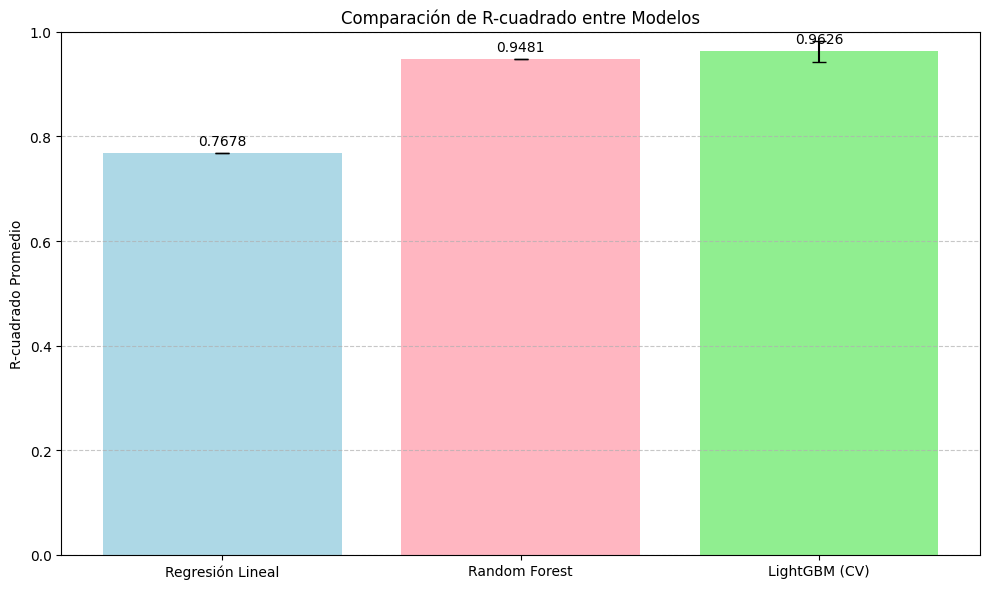

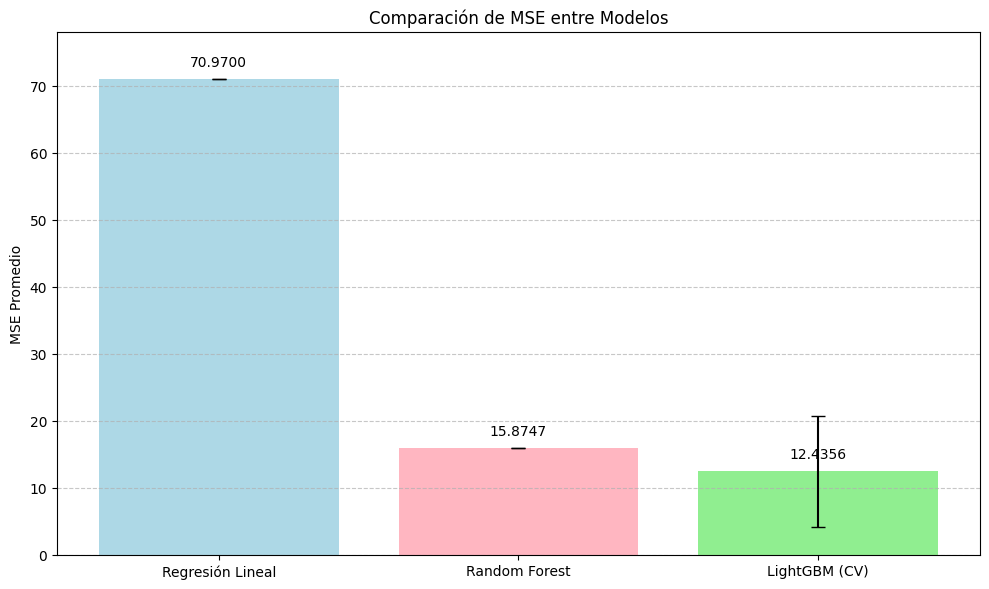


--- Gráficos de Comparación de Modelos (Barras) Generados Exitosamente ---


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Valores de Regresión Lineal (sin CV)
r2_lr = 0.7678
mse_lr = 70.9700

# Valores de Random Forest (sin CV)
r2_rf = 0.9481
mse_rf = 15.8747

# Valores de LightGBM (promedio y desviación estándar de la Cross-Validation)
r2_lgbm_mean_cv = 0.9626
r2_lgbm_std_cv = 0.0200
mse_lgbm_mean_cv = 12.4356
mse_lgbm_std_cv = 8.2967

# Preparar los datos para los gráficos
modelos = ['Regresión Lineal', 'Random Forest', 'LightGBM (CV)']

# Datos para R-cuadrado
r2_scores_mean = [r2_lr, r2_rf, r2_lgbm_mean_cv]
r2_scores_std = [0, 0, r2_lgbm_std_cv] # Las desviaciones estándar son 0 para LR y RF ya que no se hizo CV en ellos

# Datos para MSE
mse_scores_mean = [mse_lr, mse_rf, mse_lgbm_mean_cv]
mse_scores_std = [0, 0, mse_lgbm_std_cv] # Las desviaciones estándar son 0 para LR y RF ya que no se hizo CV en ellos

# --- GRÁFICO DE BARRAS PARA R-CUADRADO ---
plt.figure(figsize=(10, 6))
bars = plt.bar(modelos, r2_scores_mean, yerr=r2_scores_std, capsize=5,
               color=['#ADD8E6', '#FFB6C1', '#90EE90']) # Colores más agradables
plt.ylabel('R-cuadrado Promedio')
plt.title('Comparación de R-cuadrado entre Modelos')
plt.ylim(0, 1) # El R-cuadrado siempre está entre 0 y 1

# Añadir los valores en las barras
for i, val in enumerate(r2_scores_mean):
    plt.text(i, val + 0.01, f'{val:.4f}', ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() # Ajusta automáticamente los parámetros del subplot para un diseño ajustado
plt.show()

# --- GRÁFICO DE BARRAS PARA MSE ---
plt.figure(figsize=(10, 6))
bars = plt.bar(modelos, mse_scores_mean, yerr=mse_scores_std, capsize=5,
               color=['#ADD8E6', '#FFB6C1', '#90EE90']) # Mismos colores
plt.ylabel('MSE Promedio')
plt.title('Comparación de MSE entre Modelos')

# Ajustar el límite superior del eje Y para que el MSE de la Regresión Lineal no comprima demasiado los otros
# Aquí tomamos el máximo entre RF y LGBM y le damos un poco de margen.
# O si prefieres que se vea toda la escala de RL, ajusta el factor (ej. * 1.1)
max_mse_display = max(mse_rf, mse_lgbm_mean_cv) * 1.5 # Para que se vean bien las diferencias entre RF y LGBM
if mse_lr > max_mse_display: # Si LR es mucho mayor, aseguramos que se vea
    max_mse_display = mse_lr * 1.1

plt.ylim(0, max_mse_display)

# Añadir los valores en las barras
for i, val in enumerate(mse_scores_mean):
    plt.text(i, val + (max_mse_display * 0.02), f'{val:.4f}', ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\n--- Gráficos de Comparación de Modelos (Barras) Generados Exitosamente ---")


--- Analizando el Rendimiento del Modelo por Cultivo ---

Rendimiento del Modelo LightGBM por Cultivo (ordenado por R-cuadrado):
            Cultivo  MAE    MSE    R2  Cantidad_Registros
2           Algodón 0.68   8.19  0.97                  91
0              Maiz 1.15  19.93  0.96                 605
1              Soja 0.82  12.77  0.95                 405
8       Poroto Dark 0.16   0.09  0.89                  25
5             Sorgo 2.96 104.37  0.73                  56
4  Poroto Cranberry 0.21   0.23  0.69                  59
3      Poroto Negro 0.75  12.43  0.56                 131
6              Mani 0.60   1.11 -4.47                   9
7     Poroto Alubia 7.32 476.13 -6.09                  12


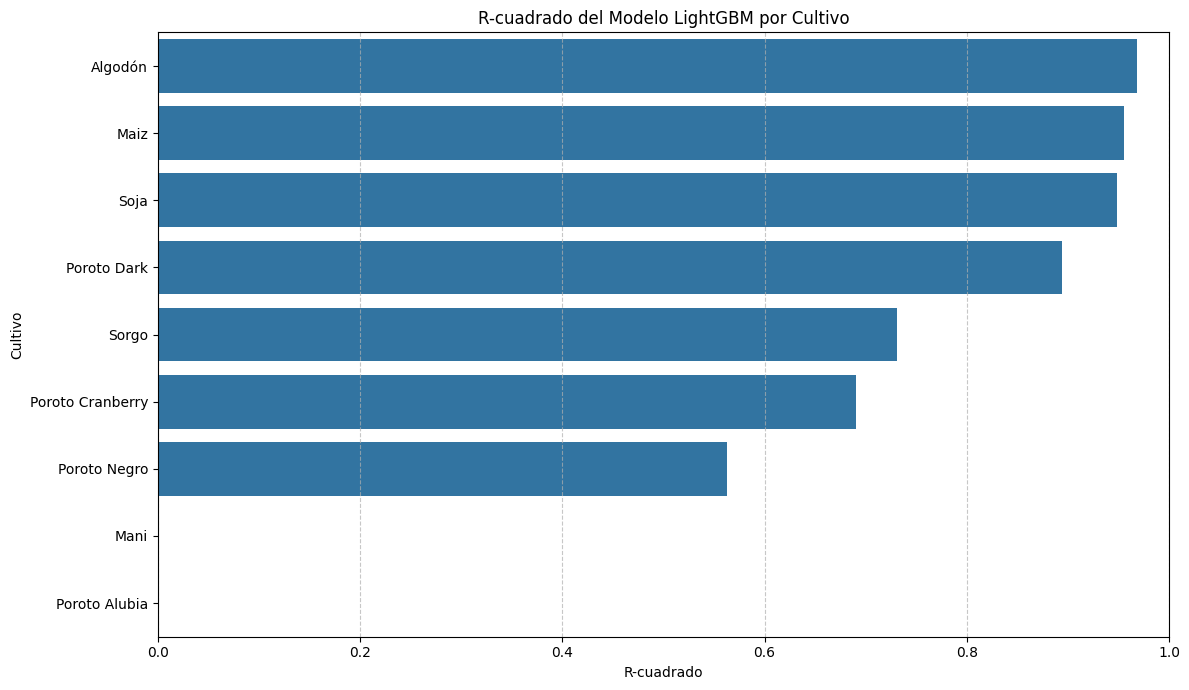

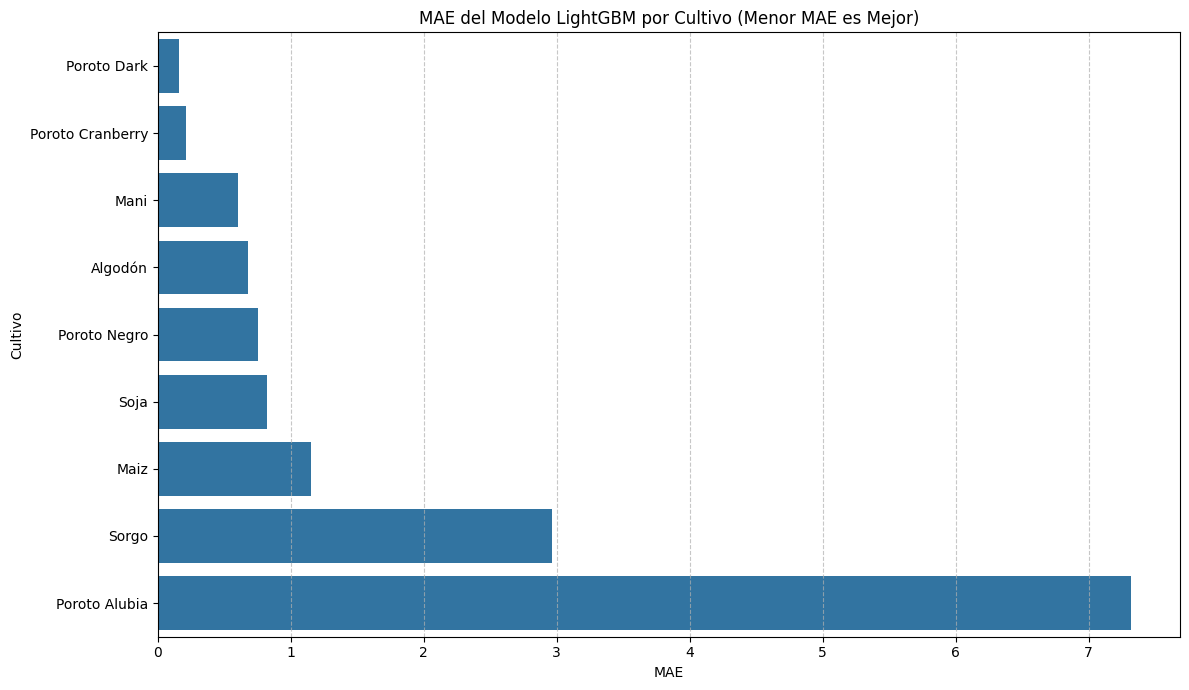


--- Análisis de Rendimiento por Cultivo Completado ---


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

print("\n--- Analizando el Rendimiento del Modelo por Cultivo ---")

# Paso 1: Crear un DataFrame con las Dosis Reales y Predichas del conjunto de prueba
# Es crucial que los índices de Y_test y Y_pred_lgbm coincidan.
# Si Y_test y Y_pred_lgbm son Series/Arrays numpy, los convertimos a Series Pandas
# y nos aseguramos de que tengan el mismo índice para la creación del DataFrame.
resultados_test = pd.DataFrame({
    'Dosis_Real': Y_test.reset_index(drop=True), # Resetear índice si Y_test es una Serie con índice original
    'Dosis_Predicha': pd.Series(Y_pred_lgbm)
})

# Calcular el error absoluto
resultados_test['Error_Absoluto'] = np.abs(resultados_test['Dosis_Real'] - resultados_test['Dosis_Predicha'])


try:
    # Esto funcionará si X_test mantuvo su índice del df original
    cultivos_test_data = df.loc[Y_test.index, 'Cultivo'].reset_index(drop=True)
except KeyError:

    print("Advertencia: El índice original de Y_test podría haberse perdido.")
    print("Intentando obtener 'Cultivo' a través de X_test_original_columns...")

    cultivos_test_data = df.loc[Y_test.index, 'Cultivo'].reset_index(drop=True)


# Añadir la columna 'Cultivo' al DataFrame de resultados
resultados_test['Cultivo'] = cultivos_test_data


# Paso 3: Agrupar por 'Cultivo' y calcular métricas de error promedio
rendimiento_por_cultivo = resultados_test.groupby('Cultivo').agg(
    MAE=('Error_Absoluto', 'mean'), # Error Absoluto Medio
    MSE=('Dosis_Real', lambda y_true, y_pred=None: mean_squared_error(y_true, resultados_test.loc[y_true.index, 'Dosis_Predicha'])),
    R2=('Dosis_Real', lambda y_true, y_pred=None: r2_score(y_true, resultados_test.loc[y_true.index, 'Dosis_Predicha'])),
    Cantidad_Registros=('Dosis_Real', 'count')
)

# Para MSE y R2 dentro de agg, necesitamos una lambda que tome y_true y mapee a y_pred
# La forma correcta es calcularlos por grupo, lo cual es más complejo directamente en agg si necesitas y_pred.
# Es mejor hacerlo con un bucle o usando una función apply en cada grupo.
# Reescribamos el cálculo para ser más robusto:

cultivos_unicos = resultados_test['Cultivo'].unique()
rendimiento_por_cultivo_lista = []

for cultivo in cultivos_unicos:
    subset = resultados_test[resultados_test['Cultivo'] == cultivo]
    if len(subset) > 1: # Necesitamos al menos 2 puntos para calcular R2
        mae = subset['Error_Absoluto'].mean()
        mse = mean_squared_error(subset['Dosis_Real'], subset['Dosis_Predicha'])
        r2 = r2_score(subset['Dosis_Real'], subset['Dosis_Predicha'])
        count = len(subset)
        rendimiento_por_cultivo_lista.append({
            'Cultivo': cultivo,
            'MAE': mae,
            'MSE': mse,
            'R2': r2,
            'Cantidad_Registros': count
        })
    elif len(subset) == 1: # Si solo hay un registro, R2 no es aplicable, MSE es 0
        mae = subset['Error_Absoluto'].mean()
        mse = 0.0 # Un solo punto, error es 0 si se predice perfecto
        r2 = np.nan # R2 no es aplicable para un solo punto
        count = len(subset)
        rendimiento_por_cultivo_lista.append({
            'Cultivo': cultivo,
            'MAE': mae,
            'MSE': mse,
            'R2': r2,
            'Cantidad_Registros': count
        })


rendimiento_por_cultivo = pd.DataFrame(rendimiento_por_cultivo_lista)
rendimiento_por_cultivo = rendimiento_por_cultivo.sort_values(by='R2', ascending=False)


print("\nRendimiento del Modelo LightGBM por Cultivo (ordenado por R-cuadrado):")
print(rendimiento_por_cultivo)

# Opcional: Visualización del rendimiento por cultivo (ej. MAE por cultivo)
plt.figure(figsize=(12, 7))
sns.barplot(x='R2', y='Cultivo', data=rendimiento_por_cultivo.sort_values(by='R2', ascending=False))
plt.title('R-cuadrado del Modelo LightGBM por Cultivo')
plt.xlabel('R-cuadrado')
plt.ylabel('Cultivo')
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 7))
sns.barplot(x='MAE', y='Cultivo', data=rendimiento_por_cultivo.sort_values(by='MAE', ascending=True))
plt.title('MAE del Modelo LightGBM por Cultivo (Menor MAE es Mejor)')
plt.xlabel('MAE')
plt.ylabel('Cultivo')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\n--- Análisis de Rendimiento por Cultivo Completado ---")

In [ ]:
rendimiento_por_cultivo

,Cultivo,MAE,MSE,R2,Cantidad_Registros
2,Algodón,0.68,8.19,0.97,91
0,Maiz,1.15,19.93,0.96,605
1,Soja,0.82,12.77,0.95,405
8,Poroto Dark,0.16,0.09,0.89,25
5,Sorgo,2.96,104.37,0.73,56
4,Poroto Cranberry,0.21,0.23,0.69,59
3,Poroto Negro,0.75,12.43,0.56,131
6,Mani,0.60,1.11,-4.47,9
7,Poroto Alubia,7.32,476.13,-6.09,12


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split # Solo para recordar que de aquí vienen X_train, X_test

# --- ¡IMPORTANTE! ---
# Asumo que X_train y X_test ya están definidos y disponibles en tu entorno,
# como resultado de una ejecución previa del train_test_split.
# Si no es así, este código dará un error de "NameError".

print("\n--- Conteo de Registros en los Conjuntos de Entrenamiento y Prueba ---")

# Número de registros en el conjunto de entrenamiento
num_registros_train = X_train.shape[0]
print(f"Número de registros en el conjunto de entrenamiento (X_train): {num_registros_train}")

# Número de registros en el conjunto de prueba
num_registros_test = X_test.shape[0]
print(f"Número de registros en el conjunto de prueba (X_test): {num_registros_test}")

# Número total de registros
total_registros = num_registros_train + num_registros_test
print(f"Número total de registros (X_train + X_test): {total_registros}")

print("\n--- Conteo Completado ---")


--- Conteo de Registros en los Conjuntos de Entrenamiento y Prueba ---
Número de registros en el conjunto de entrenamiento (X_train): 5568
Número de registros en el conjunto de prueba (X_test): 1393
Número total de registros (X_train + X_test): 6961

--- Conteo Completado ---
